In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import yaml
import scanpy as sc

In [2]:
matplotlib.style.use("fivethirtyeight")
matplotlib.pyplot.rcParams['savefig.facecolor'] = 'white'
sns.set_style("whitegrid")

matplotlib.rcParams['font.family'] = "monospace"
matplotlib.rcParams['figure.dpi'] = 300
sns.set_context("poster")
plt.rcParams.update({'font.size': 14})
matplotlib.rcParams['ytick.left'] = True
matplotlib.rcParams['xtick.bottom'] = True

In [3]:
drugs = ["abexinostat", "belinostat", "dacinostat", "entinostat", "givinostat", 
             "mocetinostat", "pracinostat", "tacedinaline", "trametinib"]
exp_order = ["homogenous_valid_set", "cmonge_ood", "Identity", "within_condition", "within_condition", "within_condition", "within_condition"]

all_mean_metrics = []
for drug in drugs:
    for embedding in ["moa", "rdkit"]:

        with open(f"/Users/alicedriessen/Box/otperturb/alice_exp/sciplex_drug_ood/{embedding}/{drug}/logs.yaml") as stream:
            logs = yaml.safe_load(stream)

        if len(logs["experiments"])>7:
            logs["experiments"]=logs["experiments"][-7:]

        print(drug, embedding, len(logs["experiments"]))
        for i in range(len(logs["experiments"])):
            mean_stats = {k: v["mean_statistics"] for k, v in logs["experiments"][i]["valid-set"].items()}
            mean_stats = pd.DataFrame(mean_stats).T
            mean_stats["eval_setting"] = exp_order[i]
            mean_stats["ood_drug"] = drug
            mean_stats["embedding"] = embedding
            all_mean_metrics.append(mean_stats)


abexinostat moa 7
abexinostat rdkit 7
belinostat moa 7
belinostat rdkit 7
dacinostat moa 7
dacinostat rdkit 7
entinostat moa 7
entinostat rdkit 7
givinostat moa 7
givinostat rdkit 7
mocetinostat moa 7
mocetinostat rdkit 7
pracinostat moa 7
pracinostat rdkit 7
tacedinaline moa 7
tacedinaline rdkit 7
trametinib moa 7
trametinib rdkit 7


In [4]:
res = pd.concat(all_mean_metrics).reset_index().rename(columns={"index": "condition"})
res["dose"] = [cond.split("-")[1] for cond in res["condition"]]
res["drug"] = [cond.split("-")[0] for cond in res["condition"]]
res

,condition,mean_wasserstein,mean_mmd,mean_sinkhorn div,mean_monge_gap,mean_drug_signature,mean_r2,eval_setting,ood_drug,embedding,dose,drug
0,belinostat-10,3.598151,0.007346,3.024427,13.667358,0.548984,0.957119,homogenous_valid_set,abexinostat,moa,10,belinostat
1,belinostat-100,3.569993,0.007970,2.996744,13.691232,0.616359,0.956598,homogenous_valid_set,abexinostat,moa,100,belinostat
2,belinostat-1000,3.631741,0.010089,3.065078,13.556308,0.763998,0.886297,homogenous_valid_set,abexinostat,moa,1000,belinostat
3,belinostat-10000,3.632773,0.012522,3.082023,13.316869,0.392550,0.993332,homogenous_valid_set,abexinostat,moa,10000,belinostat
4,dacinostat-10,3.615755,0.008823,3.047623,13.516576,0.579549,0.946742,homogenous_valid_set,abexinostat,moa,10,dacinostat
...,...,...,...,...,...,...,...,...,...,...,...,...
787,trametinib-10000,4.329329,0.031390,3.778221,13.116936,1.972521,0.360904,Identity,trametinib,rdkit,10000,trametinib
788,trametinib-10,2.673491,0.008658,2.183962,13.440170,0.400708,0.946060,within_condition,trametinib,rdkit,10,trametinib
789,trametinib-100,2.695372,0.009493,2.201168,13.315694,0.456799,0.910178,within_condition,trametinib,rdkit,100,trametinib
790,trametinib-1000,2.792244,0.009151,2.292798,13.258132,0.445255,0.932240,within_condition,trametinib,rdkit,1000,trametinib


In [5]:
sel_res = res[res["eval_setting"]=="cmonge_ood"]
sel_res

,condition,mean_wasserstein,mean_mmd,mean_sinkhorn div,mean_monge_gap,mean_drug_signature,mean_r2,eval_setting,ood_drug,embedding,dose,drug
32,abexinostat-10,2.769468,0.009932,2.196791,13.237993,0.580370,0.860881,cmonge_ood,abexinostat,moa,10,abexinostat
33,abexinostat-100,2.568855,0.009617,1.998996,13.121056,0.418130,0.936327,cmonge_ood,abexinostat,moa,100,abexinostat
34,abexinostat-1000,2.889745,0.012739,2.329269,13.137288,0.675845,0.931164,cmonge_ood,abexinostat,moa,1000,abexinostat
35,abexinostat-10000,3.404255,0.015594,2.849599,13.292877,0.819752,0.994683,cmonge_ood,abexinostat,moa,10000,abexinostat
76,abexinostat-10,6.863276,0.129214,6.290570,12.654248,5.375520,0.105051,cmonge_ood,abexinostat,rdkit,10,abexinostat
...,...,...,...,...,...,...,...,...,...,...,...,...
739,trametinib-10000,3.562195,0.023369,3.011507,13.090679,1.267080,0.577290,cmonge_ood,trametinib,moa,10000,trametinib
780,trametinib-10,3.926643,0.023490,3.375155,13.249895,1.414531,0.485317,cmonge_ood,trametinib,rdkit,10,trametinib
781,trametinib-100,3.865055,0.024113,3.311480,13.072442,1.368600,0.383006,cmonge_ood,trametinib,rdkit,100,trametinib
782,trametinib-1000,3.947938,0.029876,3.391686,13.014245,1.596595,0.267864,cmonge_ood,trametinib,rdkit,1000,trametinib


In [6]:
moa = pd.read_csv("~/Box/otperturb/alice_exp/models/embed/moa", index_col=0)
moa_dist = pd.read_csv("~/Box/otperturb/alice_exp/models/embed/moa_eucl_dist.csv", index_col=0)
moa_sim = pd.read_csv("~/Box/otperturb/alice_exp/models/embed/moa_silimarity.csv", index_col=0)
rdkit = pd.read_csv("~/Box/otperturb/alice_exp/models/embed/rdkit", index_col=0)
rdkit_dist = pd.read_csv("~/Box/otperturb/alice_exp/models/embed/rdkit_eucl_dist.csv", index_col=0)
rdkit_sim = pd.read_csv("~/Box/otperturb/alice_exp/models/embed/rdkit_silimarity.csv", index_col=0)

# Figures

In [7]:
rdkit_dist

,abexinostat,belinostat,dacinostat,entinostat,givinostat,mocetinostat,pracinostat,tacedinaline,trametinib
drug,,,,,,,,,
abexinostat,NaN,13.293199,12.559467,29.287131,13.230304,17.925149,14.841516,18.253902,19.120370
belinostat,13.293199,NaN,10.838751,28.505861,12.956199,16.867501,13.151165,15.150374,18.531610
dacinostat,12.559467,10.838751,NaN,28.776949,11.629938,16.357727,11.640437,17.372470,18.766406
entinostat,29.287131,28.505861,28.776949,NaN,28.775969,24.597587,30.129439,24.844893,28.097756
givinostat,13.230304,12.956199,11.629938,28.775969,NaN,17.503899,14.320861,18.329982,17.158694
mocetinostat,17.925149,16.867501,16.357727,24.597587,17.503899,NaN,18.582801,9.794286,14.287066
pracinostat,14.841516,13.151165,11.640437,30.129439,14.320861,18.582801,NaN,19.169199,19.793703
tacedinaline,18.253902,15.150374,17.372470,24.844893,18.329982,9.794286,19.169199,NaN,17.485682
trametinib,19.120370,18.531610,18.766406,28.097756,17.158694,14.287066,19.793703,17.485682,NaN


In [9]:
moa_drug_dist = moa_dist.mean().sort_values().reset_index().rename(columns={"index": "condition", 0:"Mean Distance"})
moa_drug_dist[["drug", "dose"]] = [c.split("-") for c in moa_drug_dist["condition"]]
moa_drug_dist = moa_drug_dist.groupby("drug").mean(numeric_only=True)


moa_drug_dist

,Mean Distance
drug,
abexinostat,0.714248
belinostat,0.727177
dacinostat,0.734368
entinostat,0.686892
givinostat,0.706771
mocetinostat,0.770436
pracinostat,0.726201
tacedinaline,0.671947
trametinib,0.692870


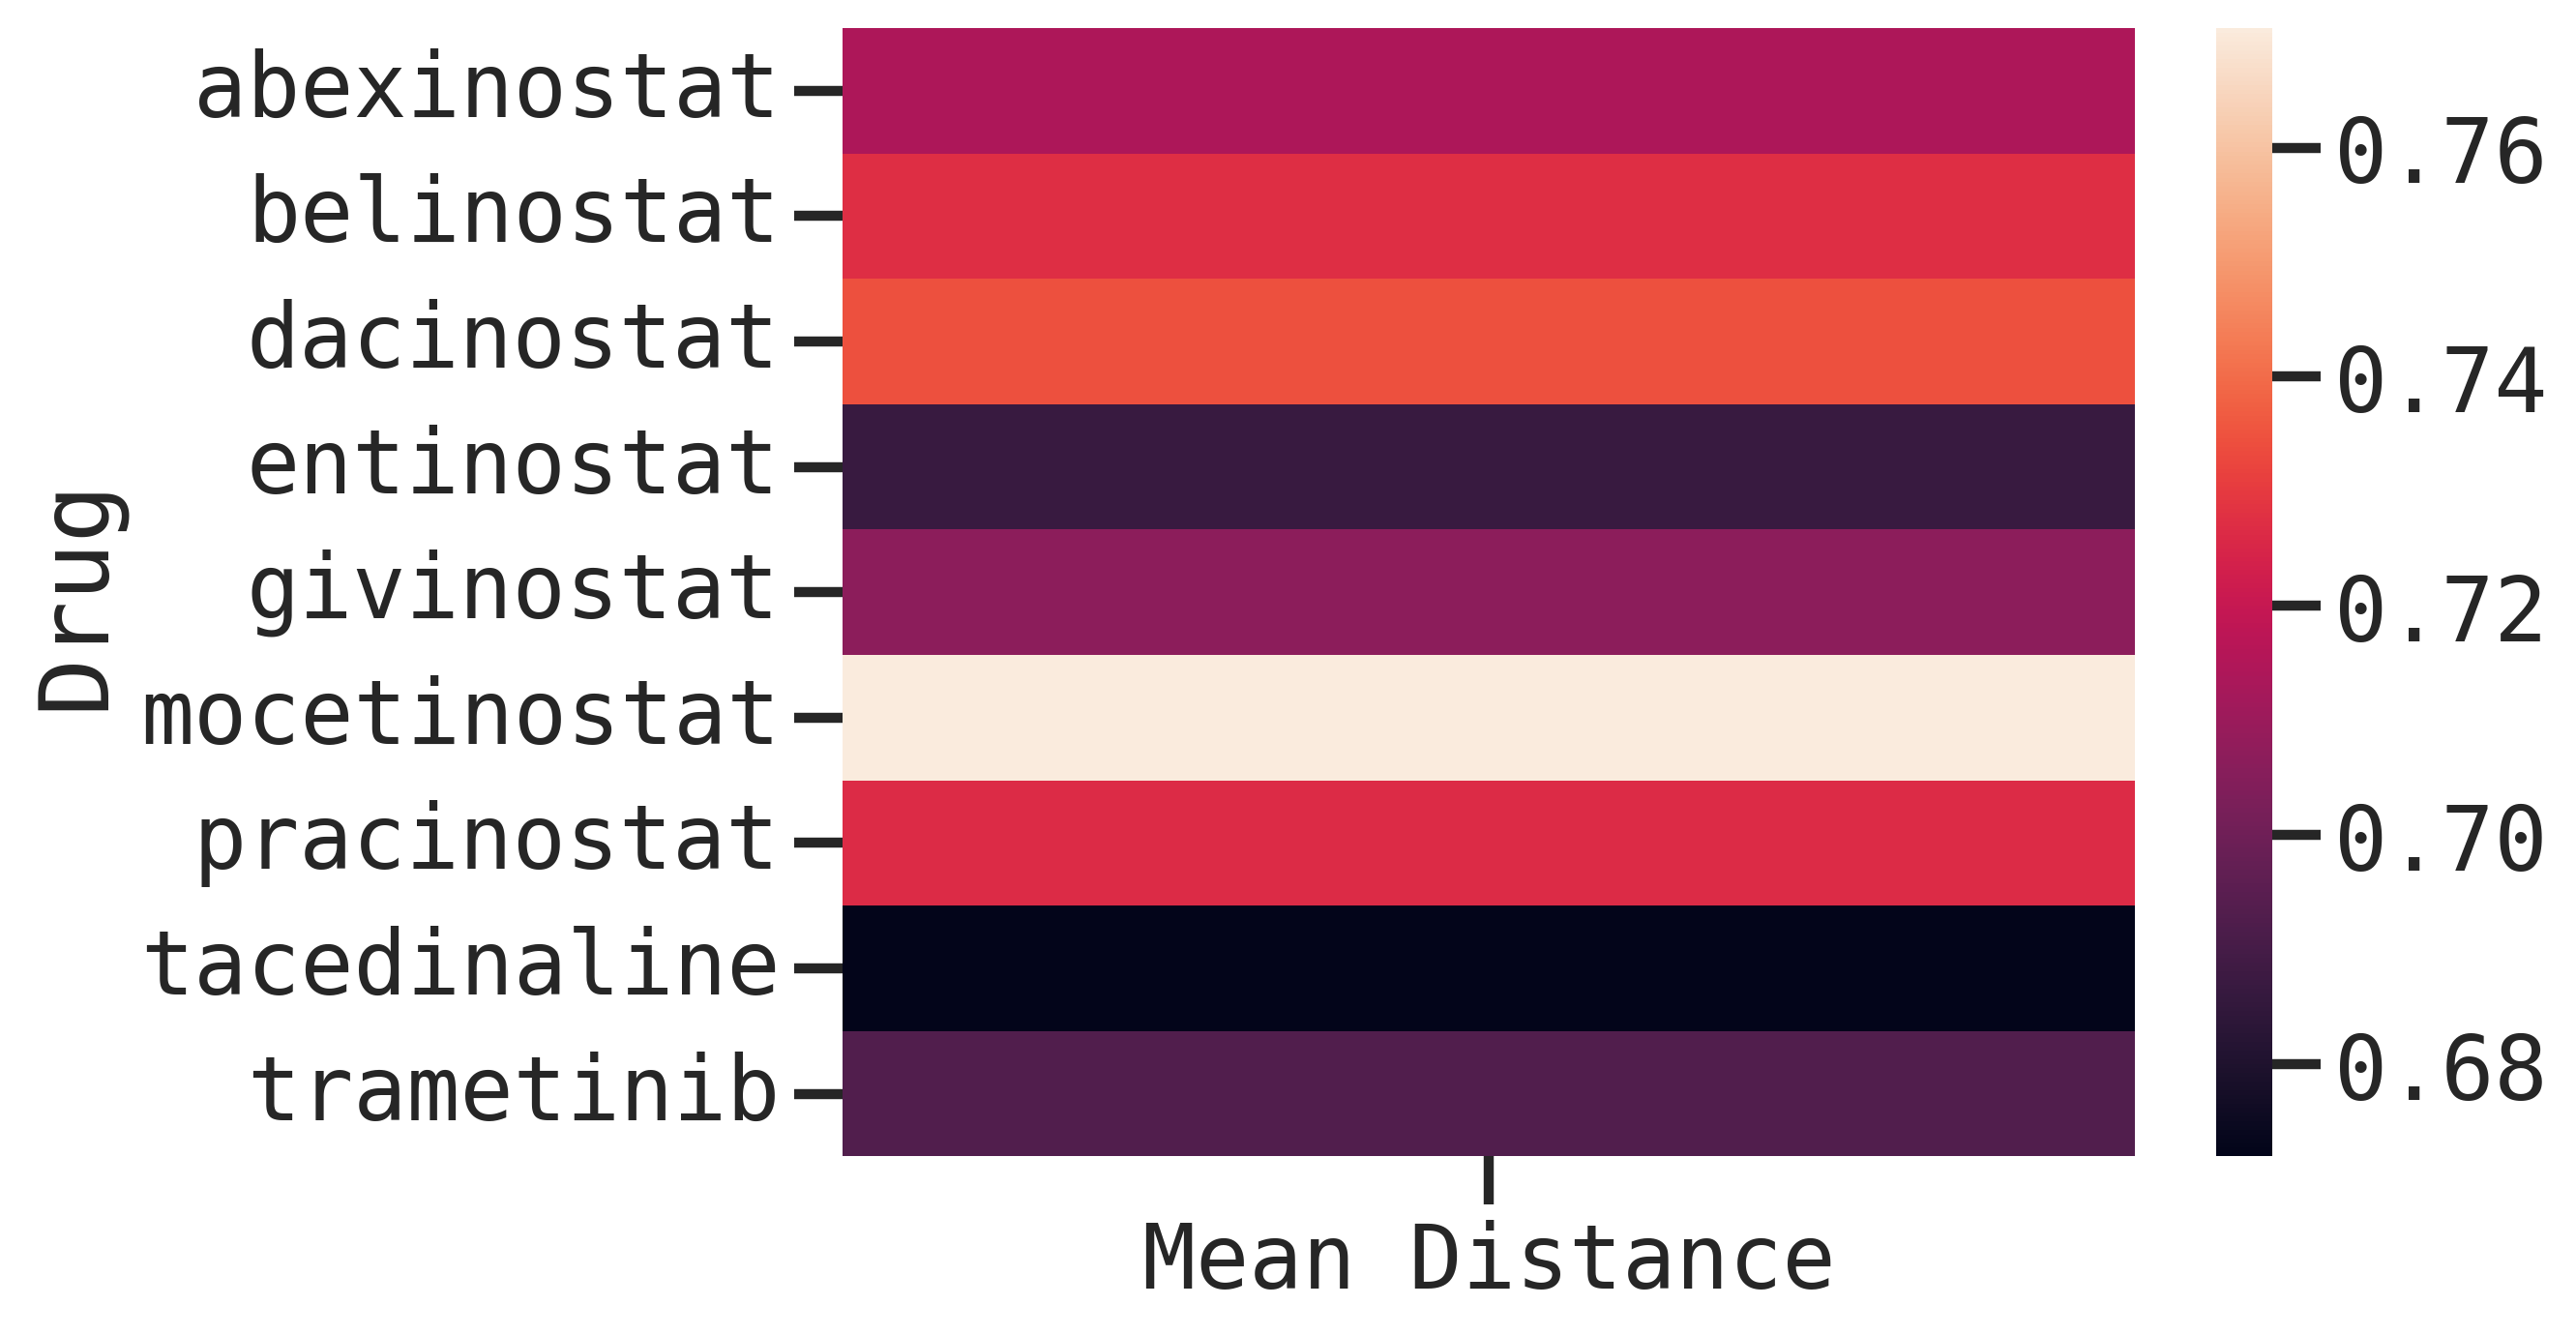

In [10]:
sns.heatmap(moa_drug_dist)
plt.ylabel("Drug")
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/MoA_embed_mean_dist_heatmap.png", bbox_inches="tight")

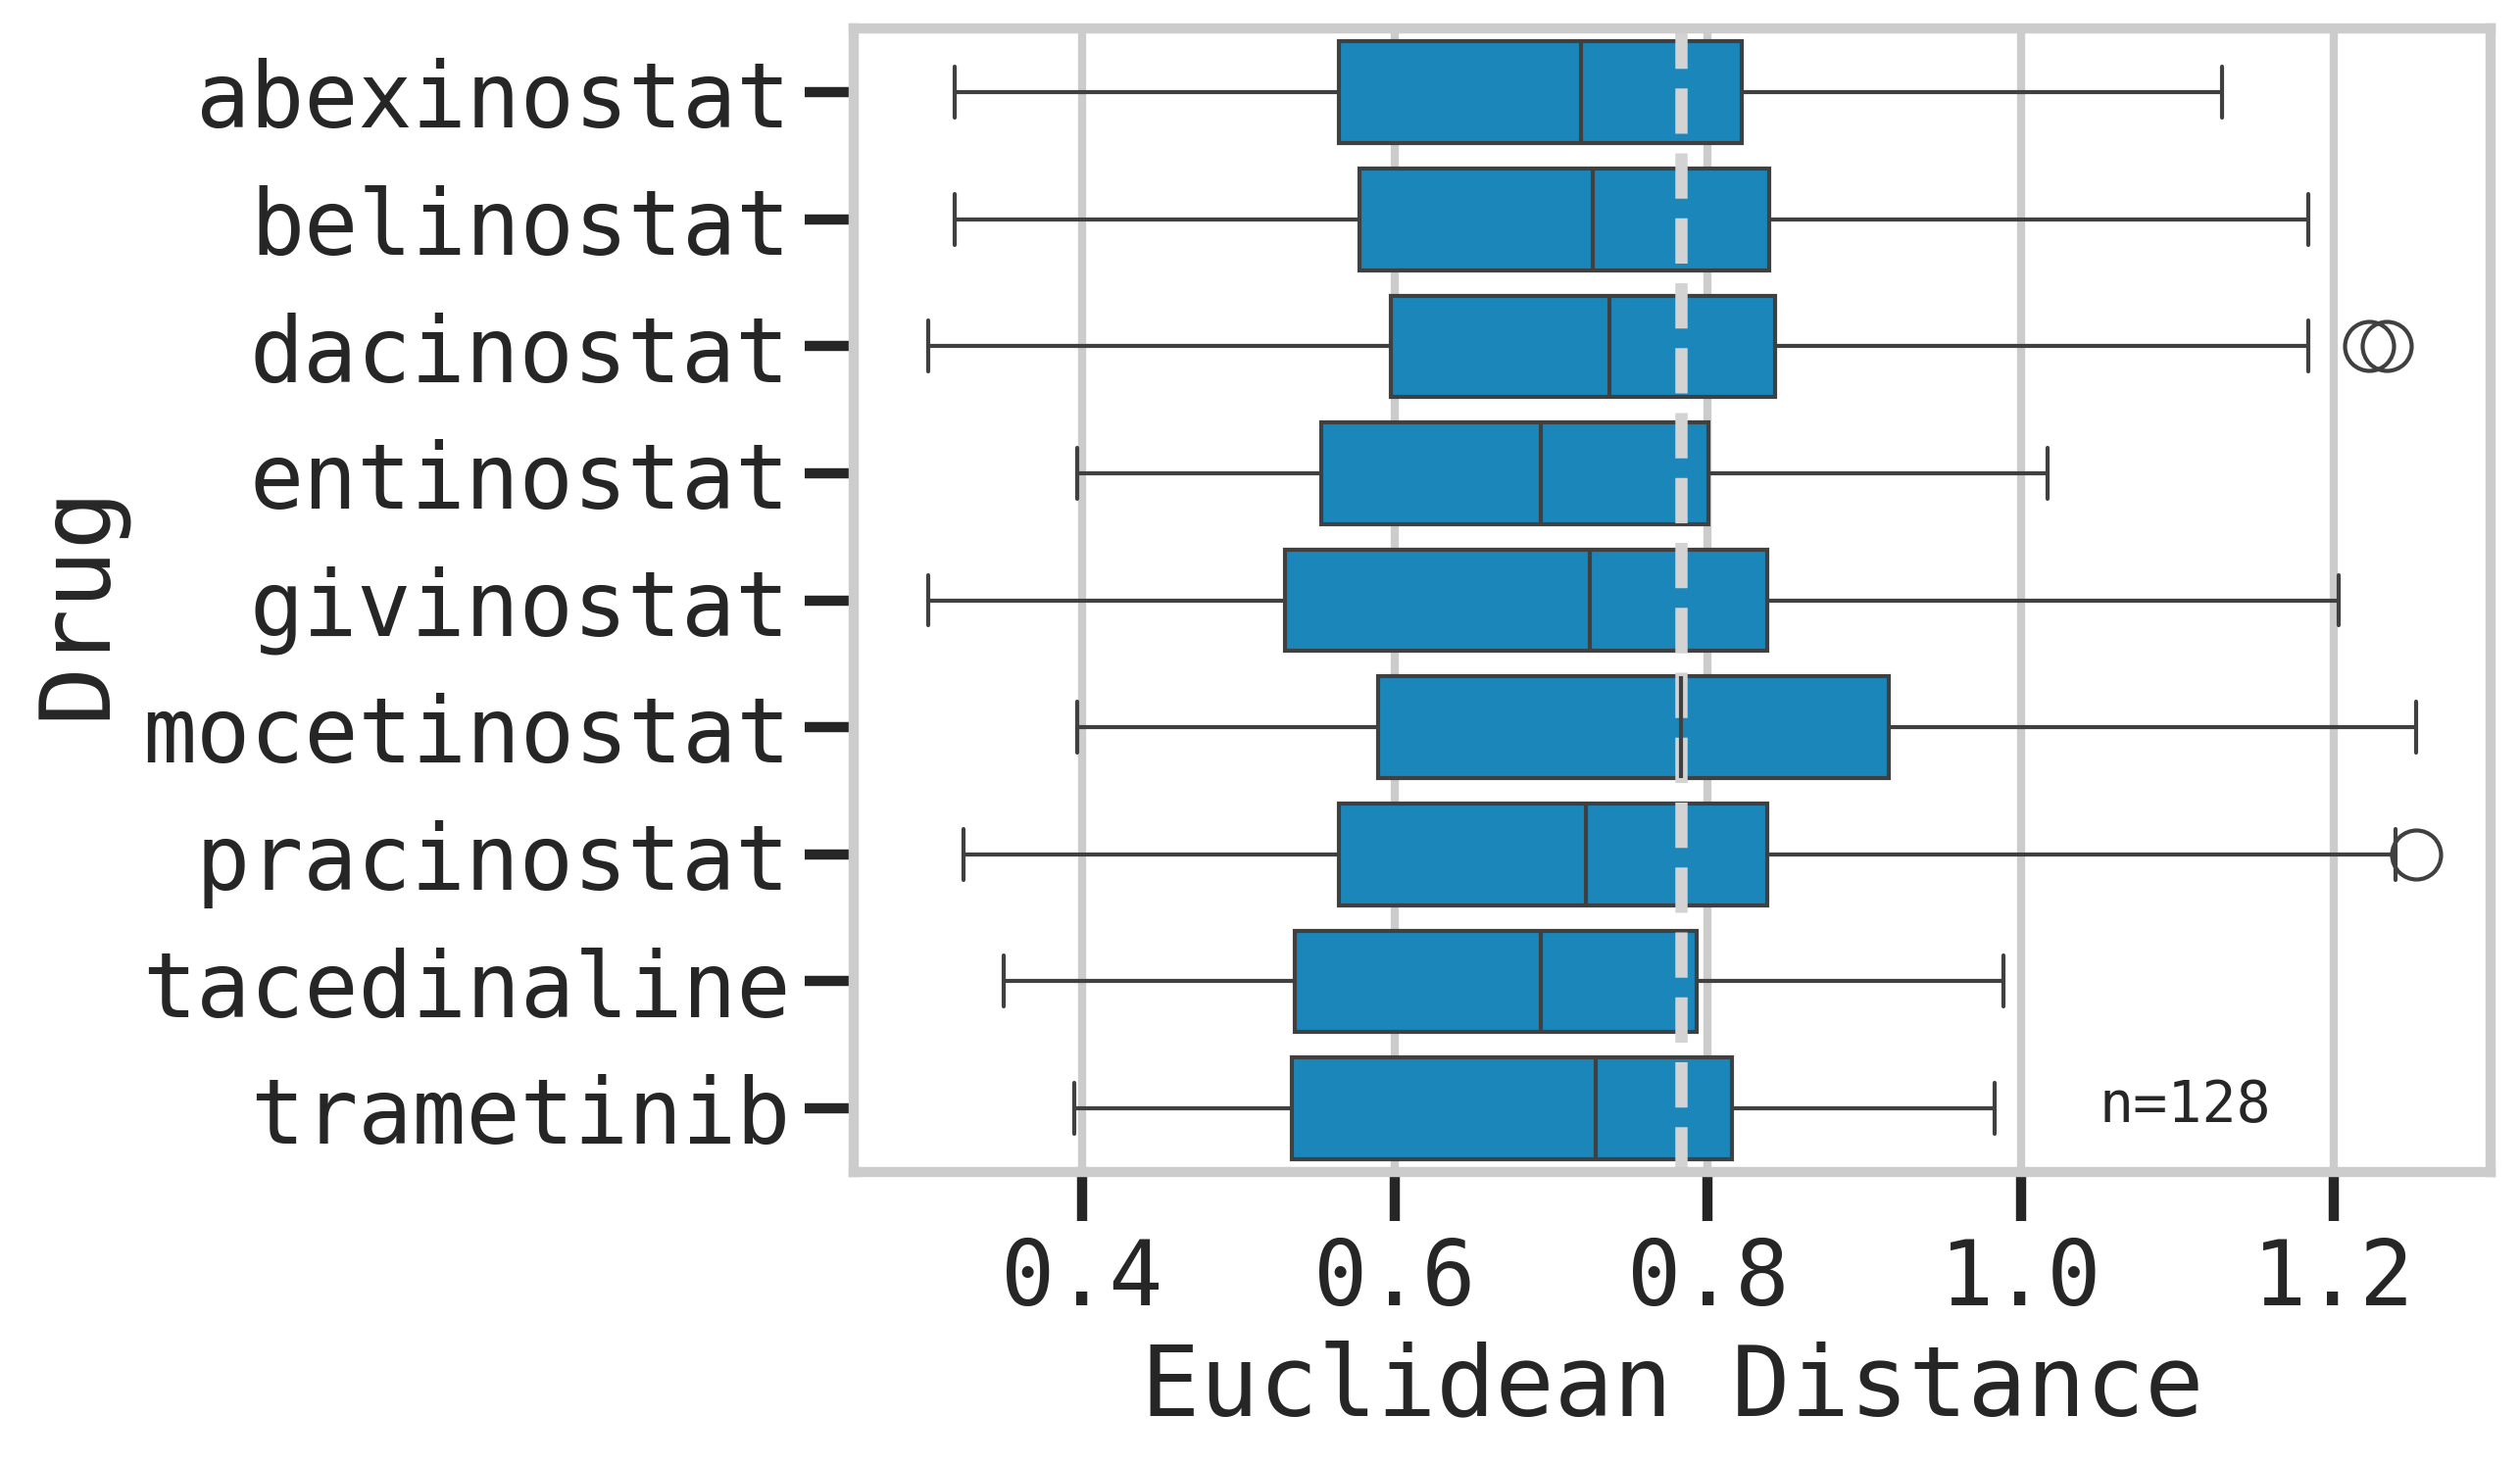

In [19]:
temp = moa_dist.where(np.triu(np.ones(moa_dist.shape)).astype(bool))
temp = temp.stack().reset_index()
temp.columns=["Drug1", "Drug2", "Euclidean Distance"]
plt_data = pd.concat([temp[["Drug1", "Euclidean Distance"]], temp[["Drug2", "Euclidean Distance"]].rename(columns={"Drug2": "Drug1"})])
plt_data["Drug"] = [d.split("-")[0] for d in plt_data["Drug1"]]

moce_median = plt_data.loc[plt_data["Drug"] == "mocetinostat", "Euclidean Distance"].median()

sns.boxplot(data=plt_data, x="Euclidean Distance", y="Drug")
plt.axvline(x=moce_median, linestyle="--", color="lightgrey")
plt.text(x=1.05, y=8.1, s="n=128")
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/MoA_embed_dist_boxplot.pdf", bbox_inches="tight")

In [15]:
plt_data.groupby("Drug").size()

Drug
abexinostat     128
belinostat      128
dacinostat      128
entinostat      128
givinostat      128
mocetinostat    128
pracinostat     128
tacedinaline    128
trametinib      128
dtype: int64

In [20]:
for cond, closest_cond in moa_sim["similar"].items():
    sel_res.loc[(sel_res["condition"]==cond)&(sel_res["embedding"]=="moa"), "cond_dist"] = moa_dist.loc[cond, closest_cond]
    
for drug, closest_drug in rdkit_sim["similar"].items():    
    sel_res.loc[(sel_res["drug"]==drug)&(sel_res["embedding"]=="rdkit"), "drug_dist"] = rdkit_dist.loc[drug, closest_drug]
    sel_res.loc[(sel_res["drug"]==drug)&(sel_res["embedding"]=="moa"), "drug_dist"] = moa_drug_dist.loc[drug, "mean_dist"]

KeyError: 'mean_dist'

In [21]:
print(sel_res.cond_dist.isna().sum())
print(sel_res.drug_dist.isna().sum())

36
68


(-0.5, 1.5)

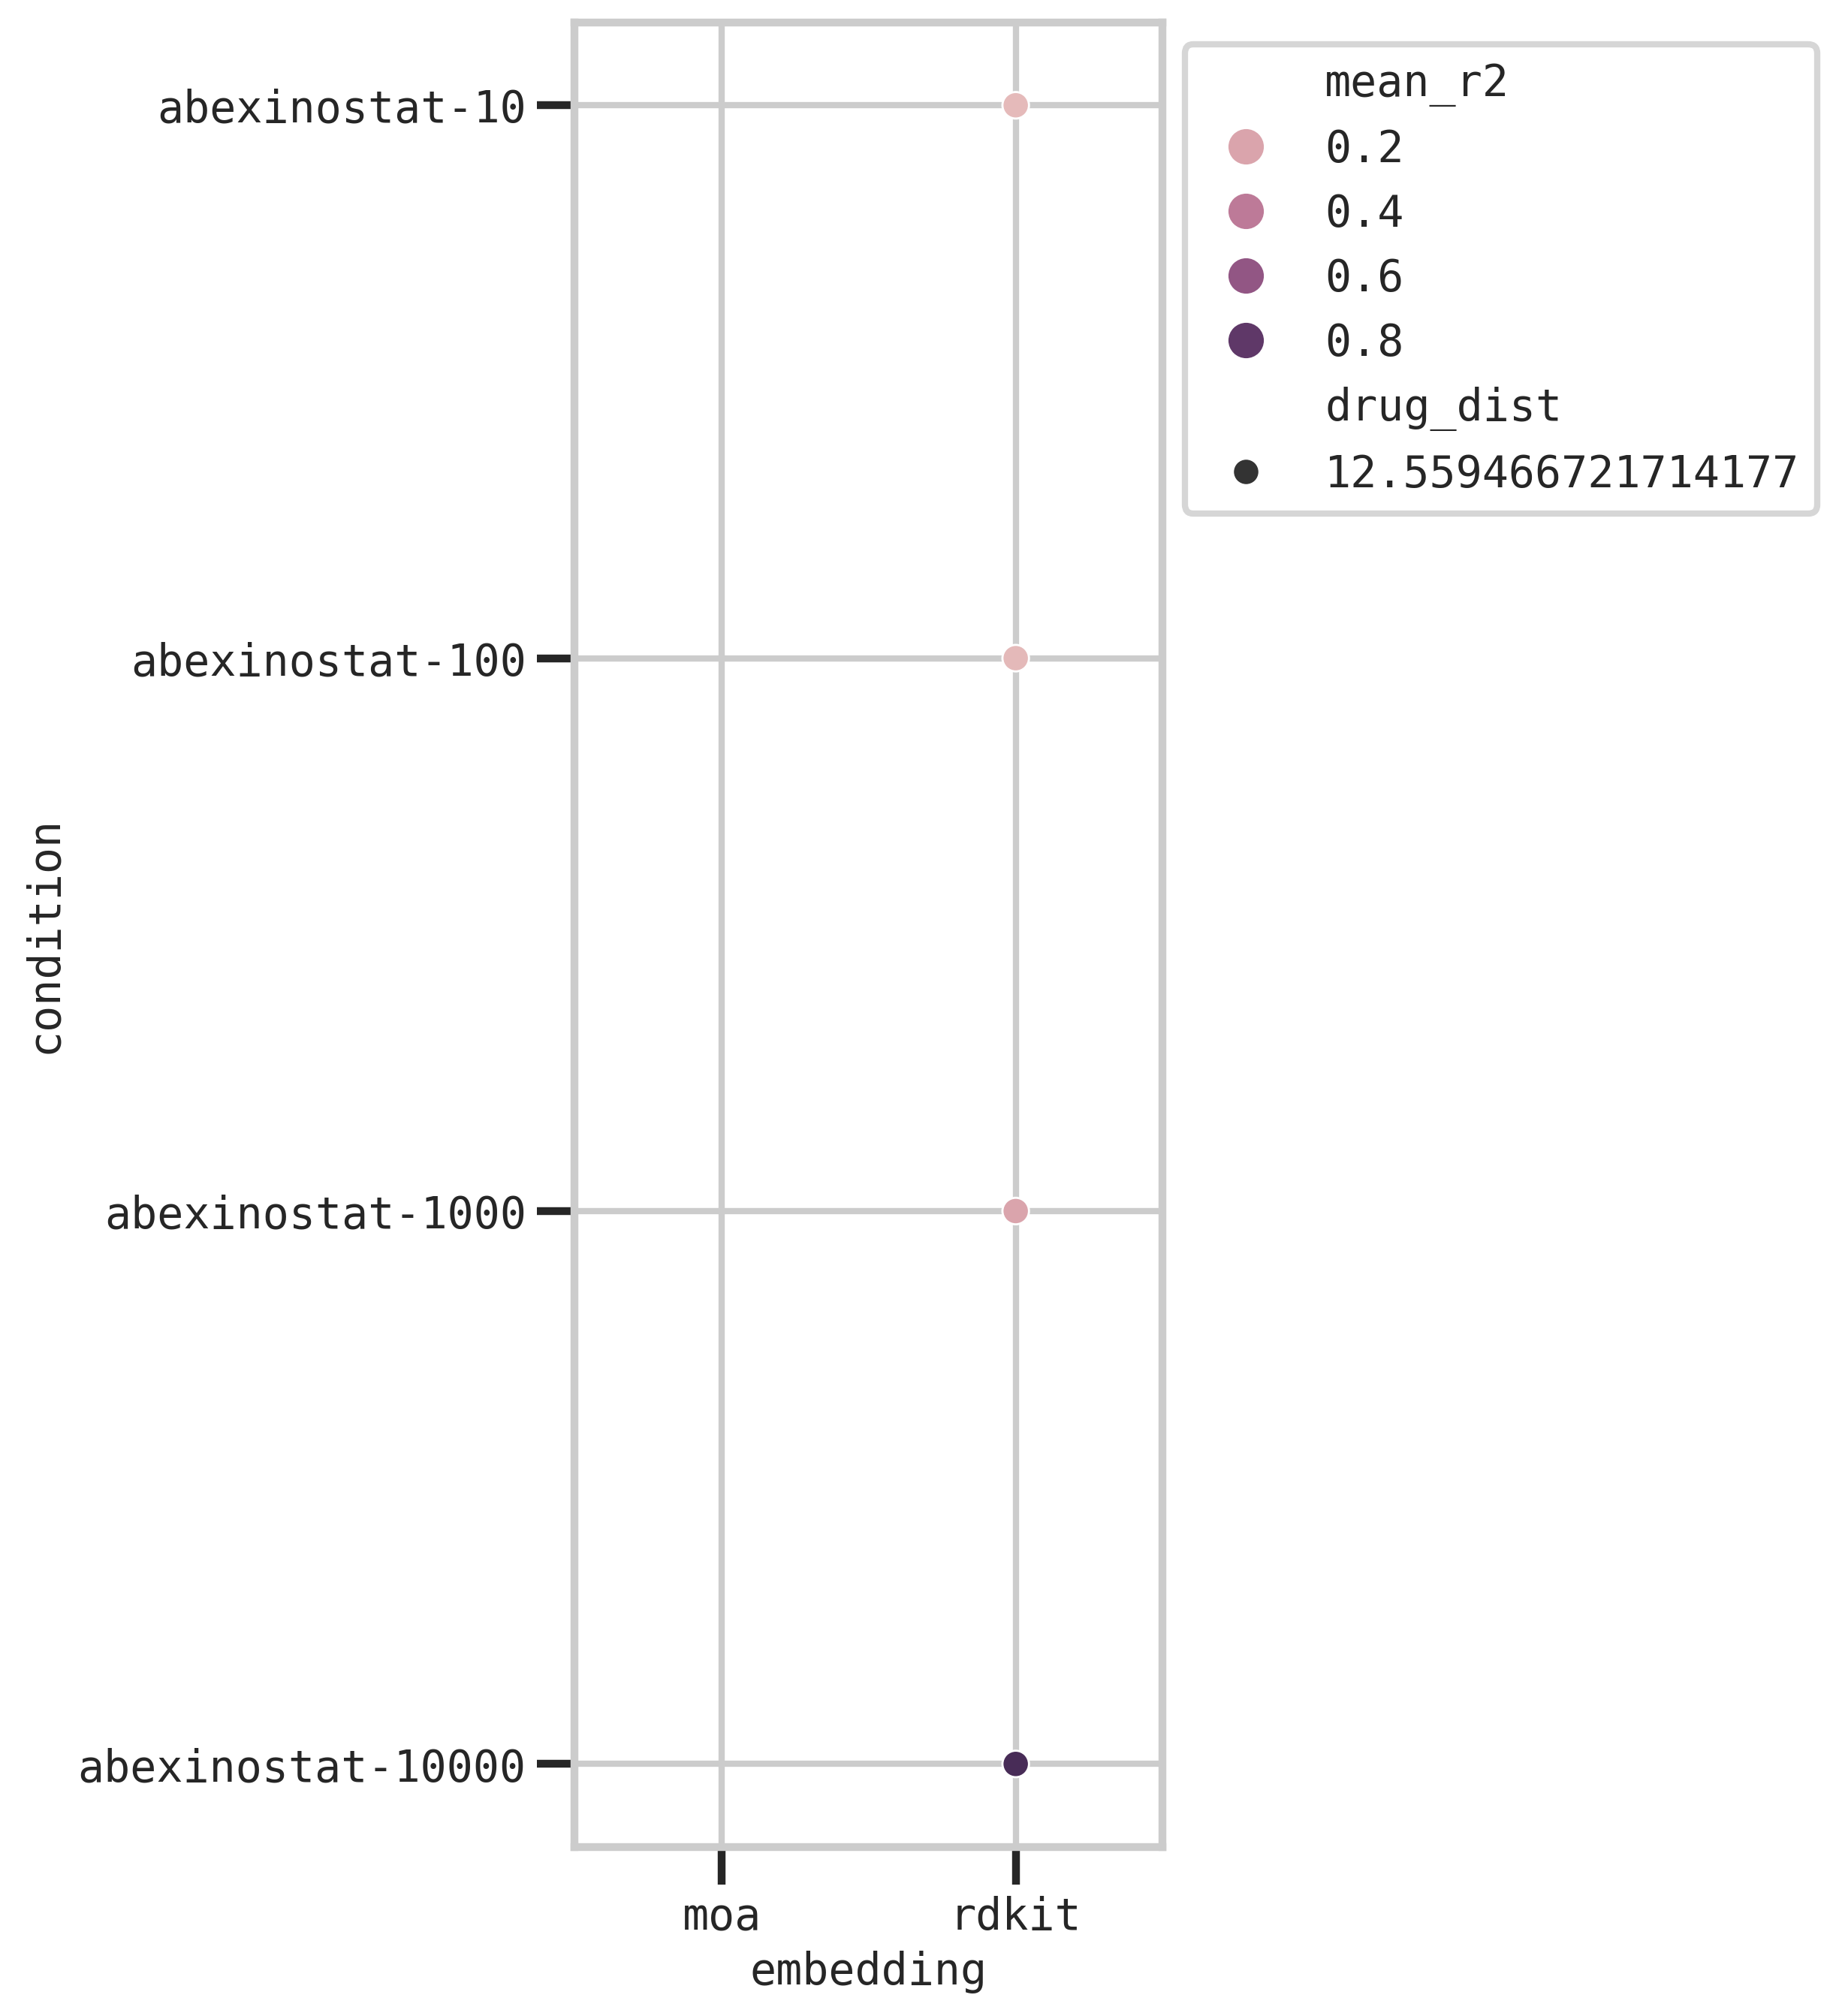

In [22]:
plt.figure(figsize=(3,10))
sns.scatterplot(data=sel_res, x="embedding", y="condition", hue="mean_r2", size="drug_dist")
plt.legend(fontsize=14, bbox_to_anchor=(1,1))
plt.xlabel("embedding", fontsize=14)
plt.ylabel("condition", fontsize=14)
plt.tick_params(which="both", axis="both", labelsize=14)
plt.xlim((-.5,1.5))

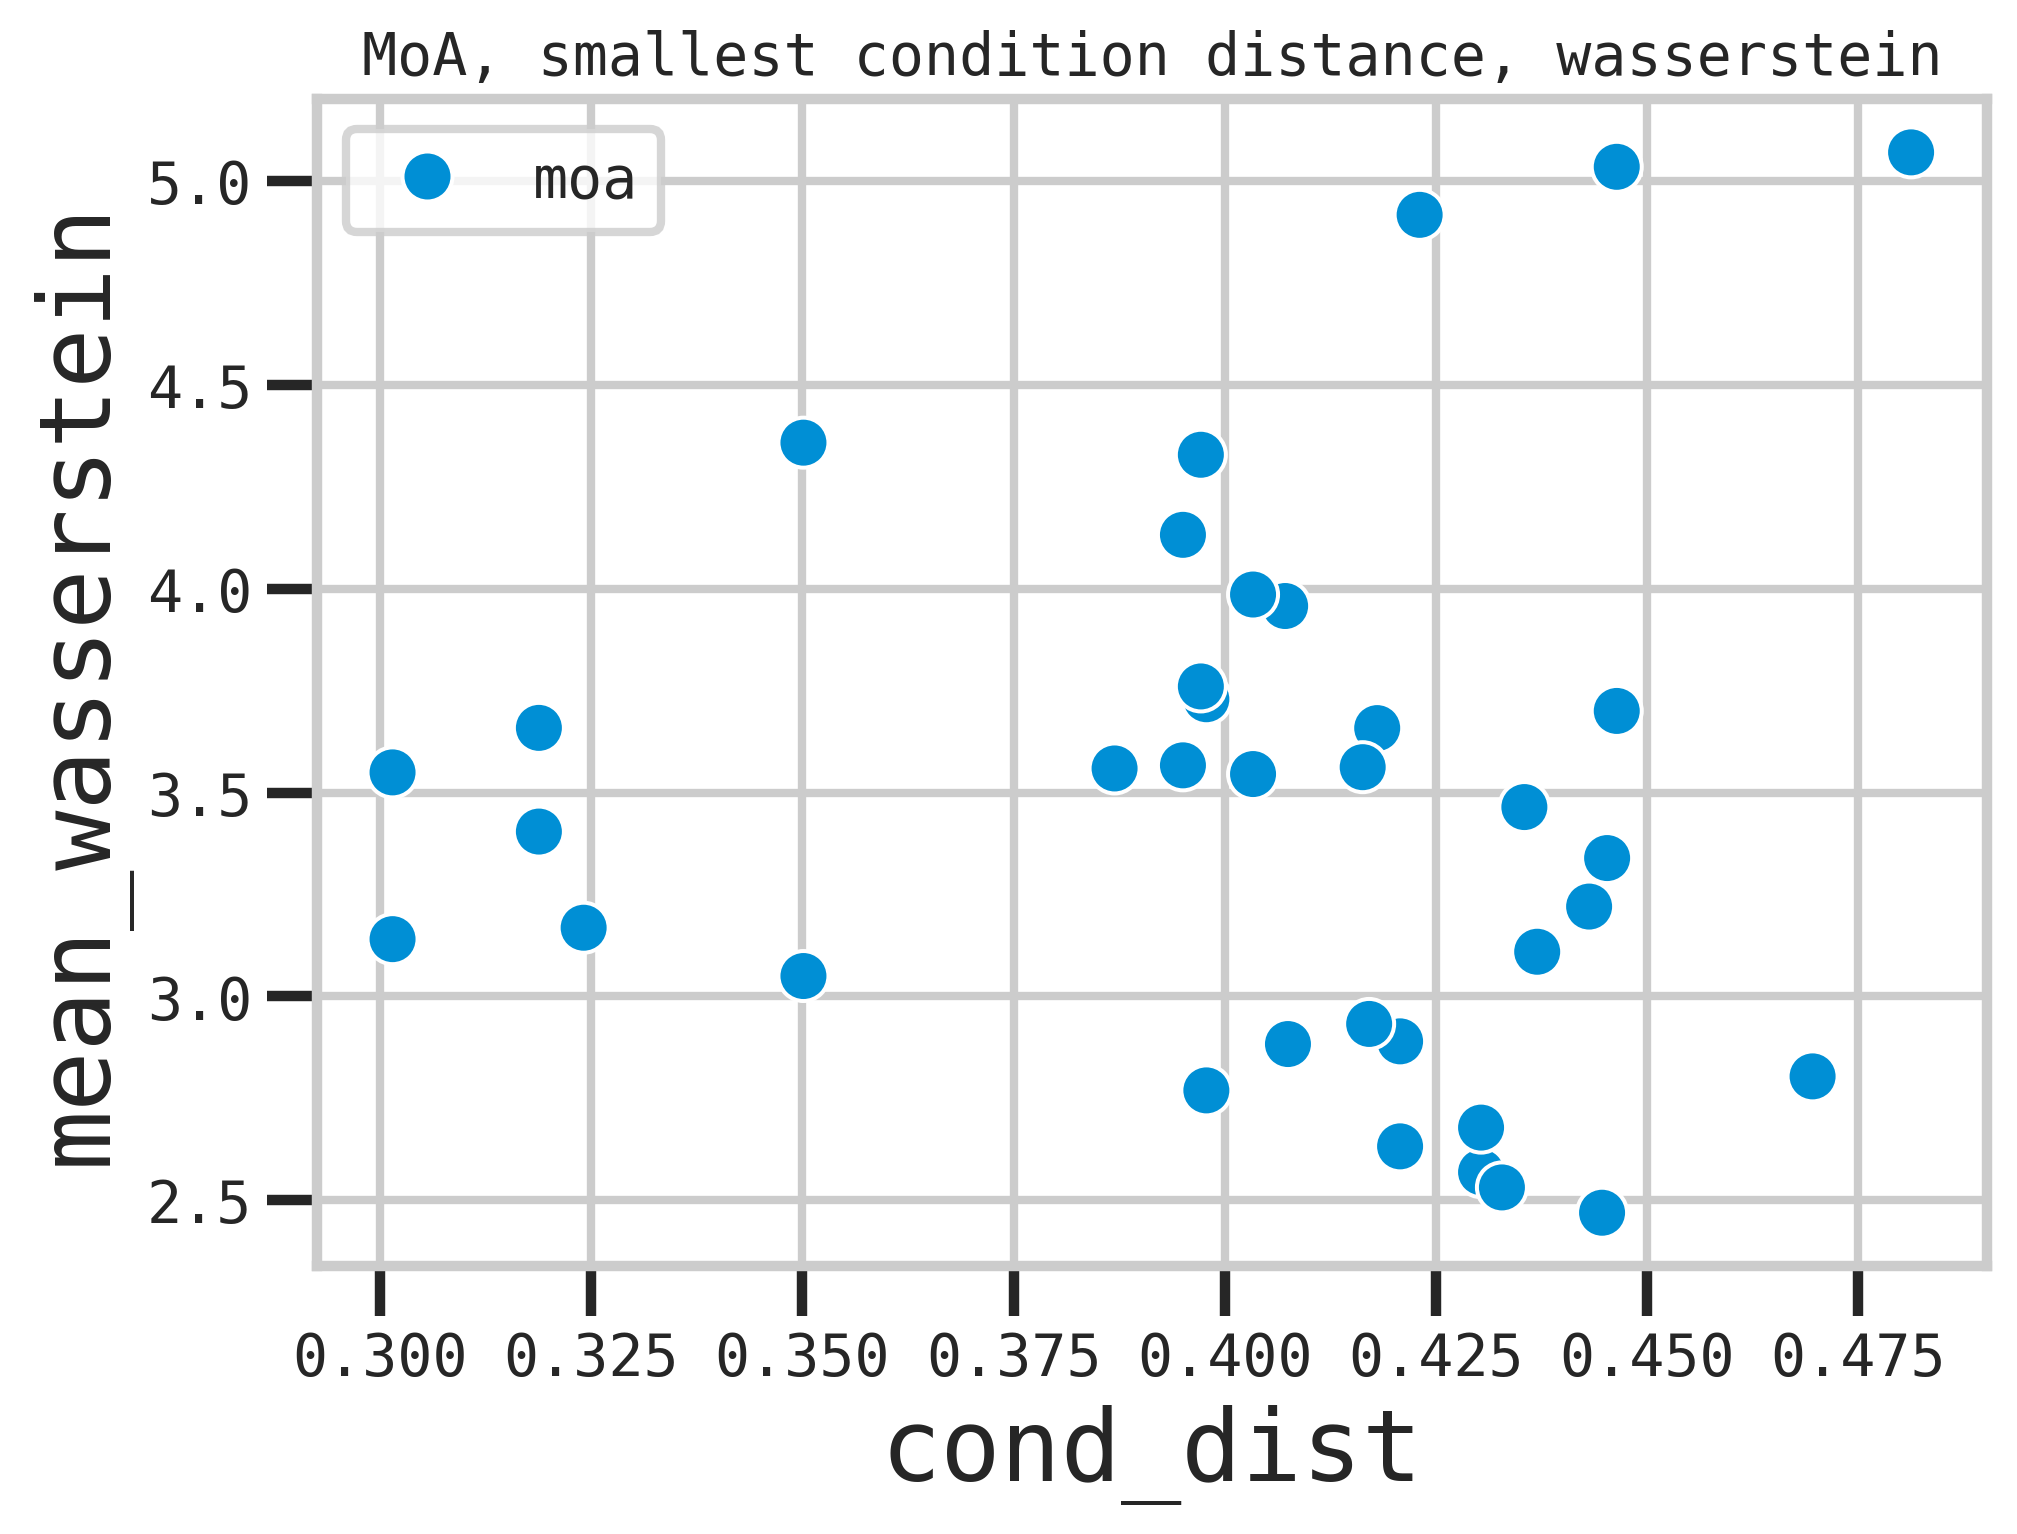

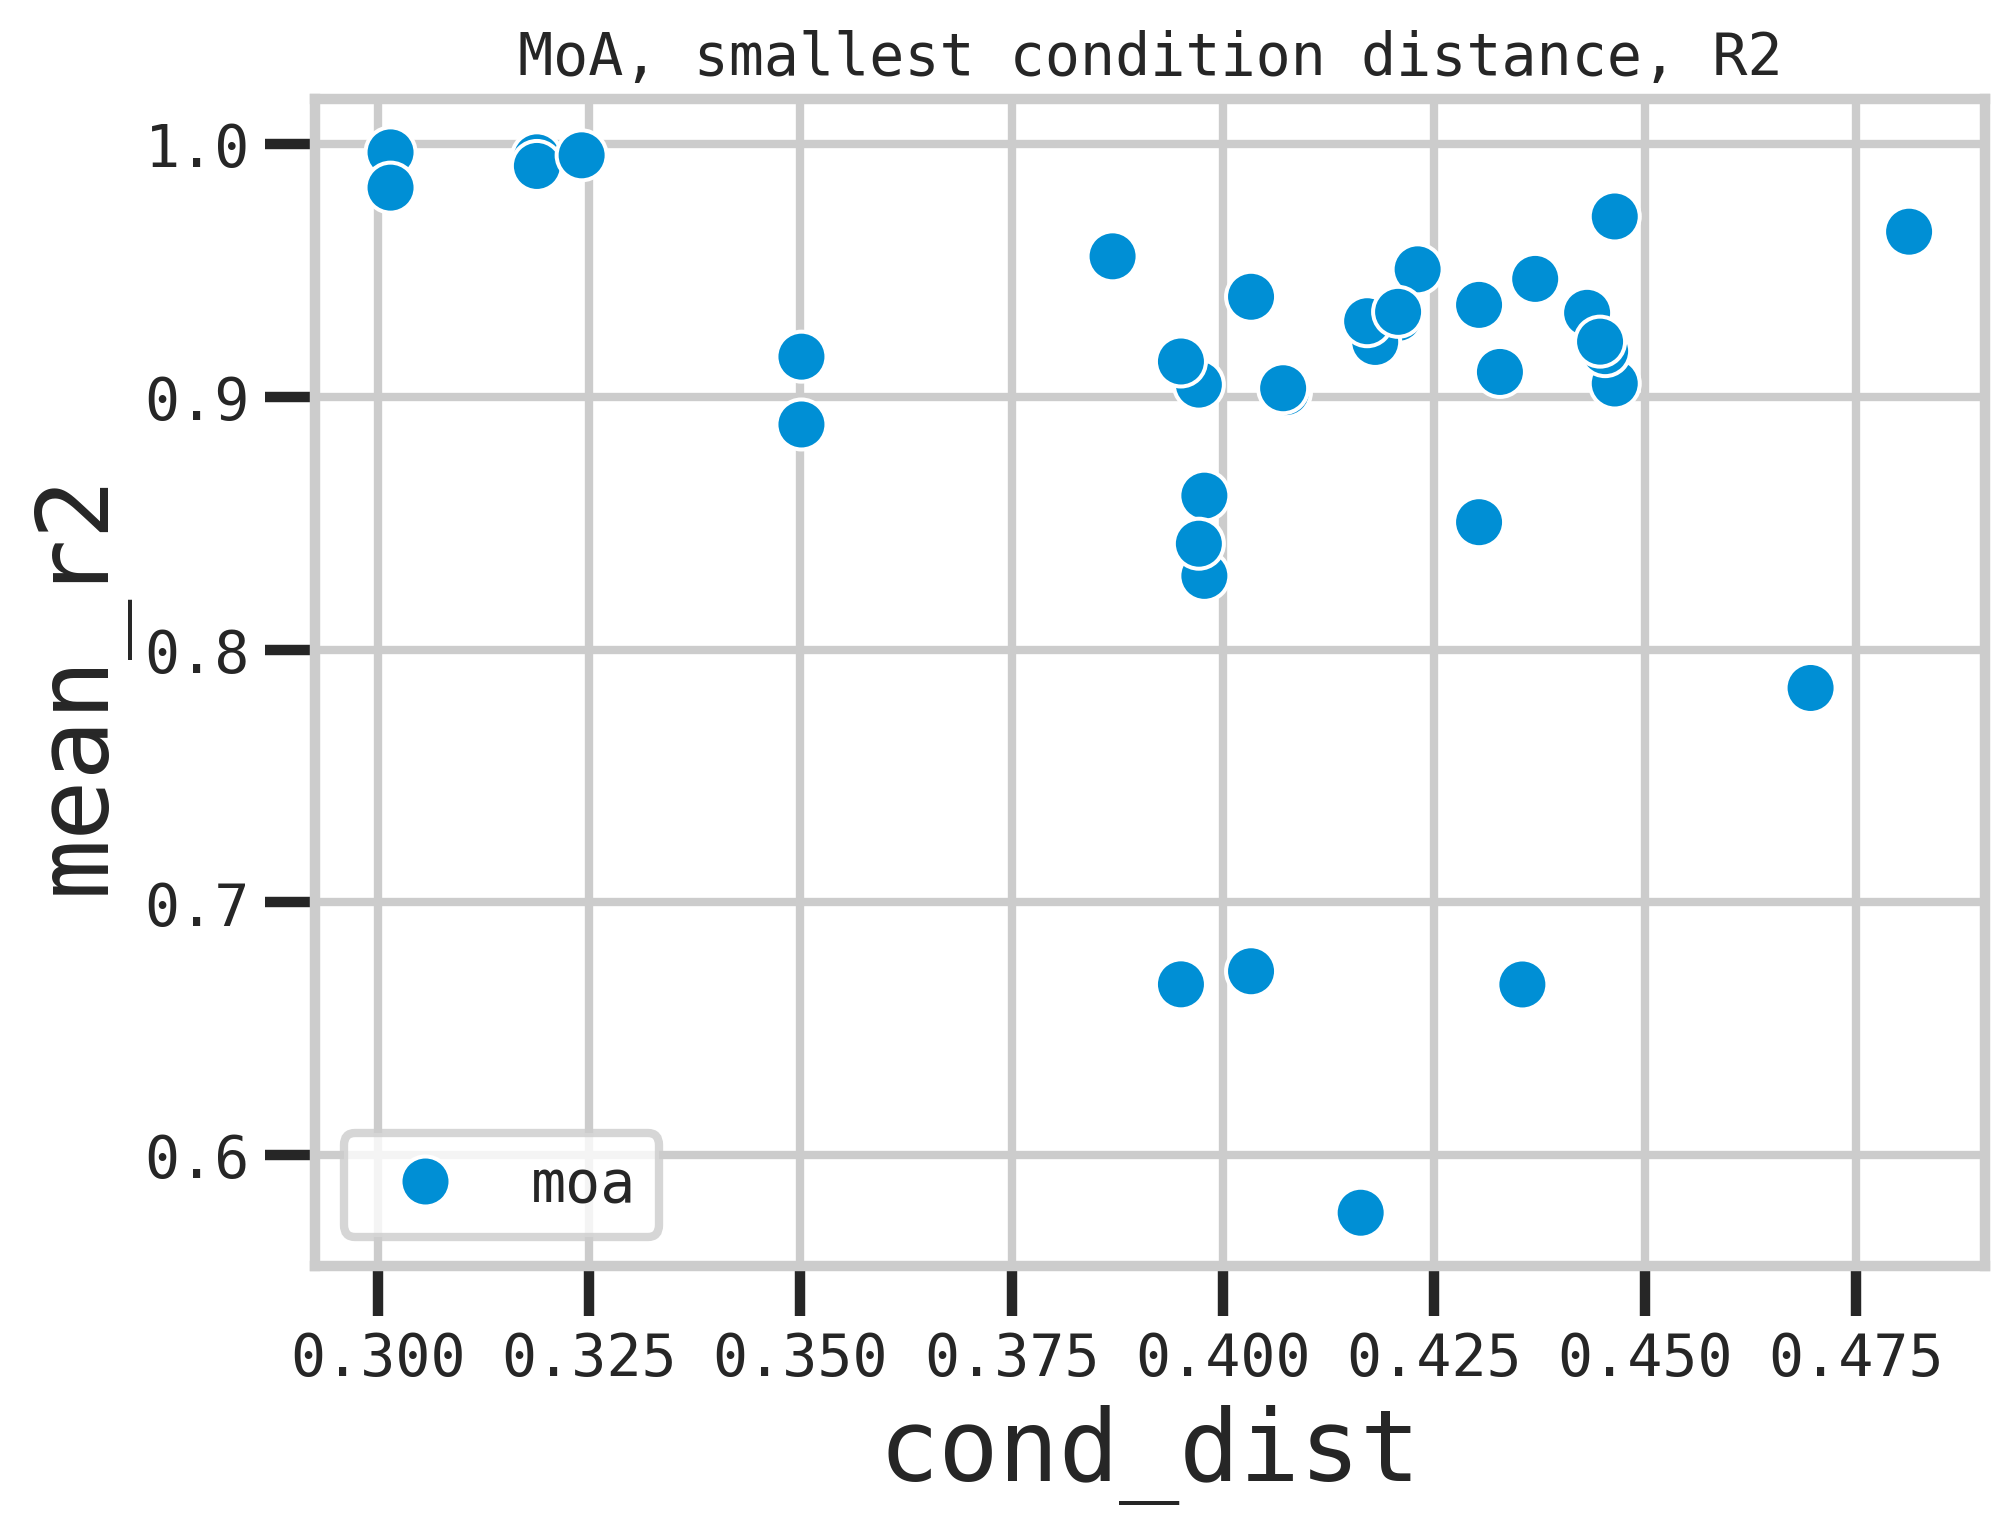

In [23]:
sns.scatterplot(data=sel_res[sel_res["embedding"]=="moa"], x="cond_dist", y="mean_wasserstein", hue="embedding")
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("MoA, smallest condition distance, wasserstein", fontsize=14)
plt.show()

sns.scatterplot(data=sel_res[sel_res["embedding"]=="moa"], x="cond_dist", y="mean_r2", hue="embedding")
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("MoA, smallest condition distance, R2", fontsize=14)
plt.show()

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

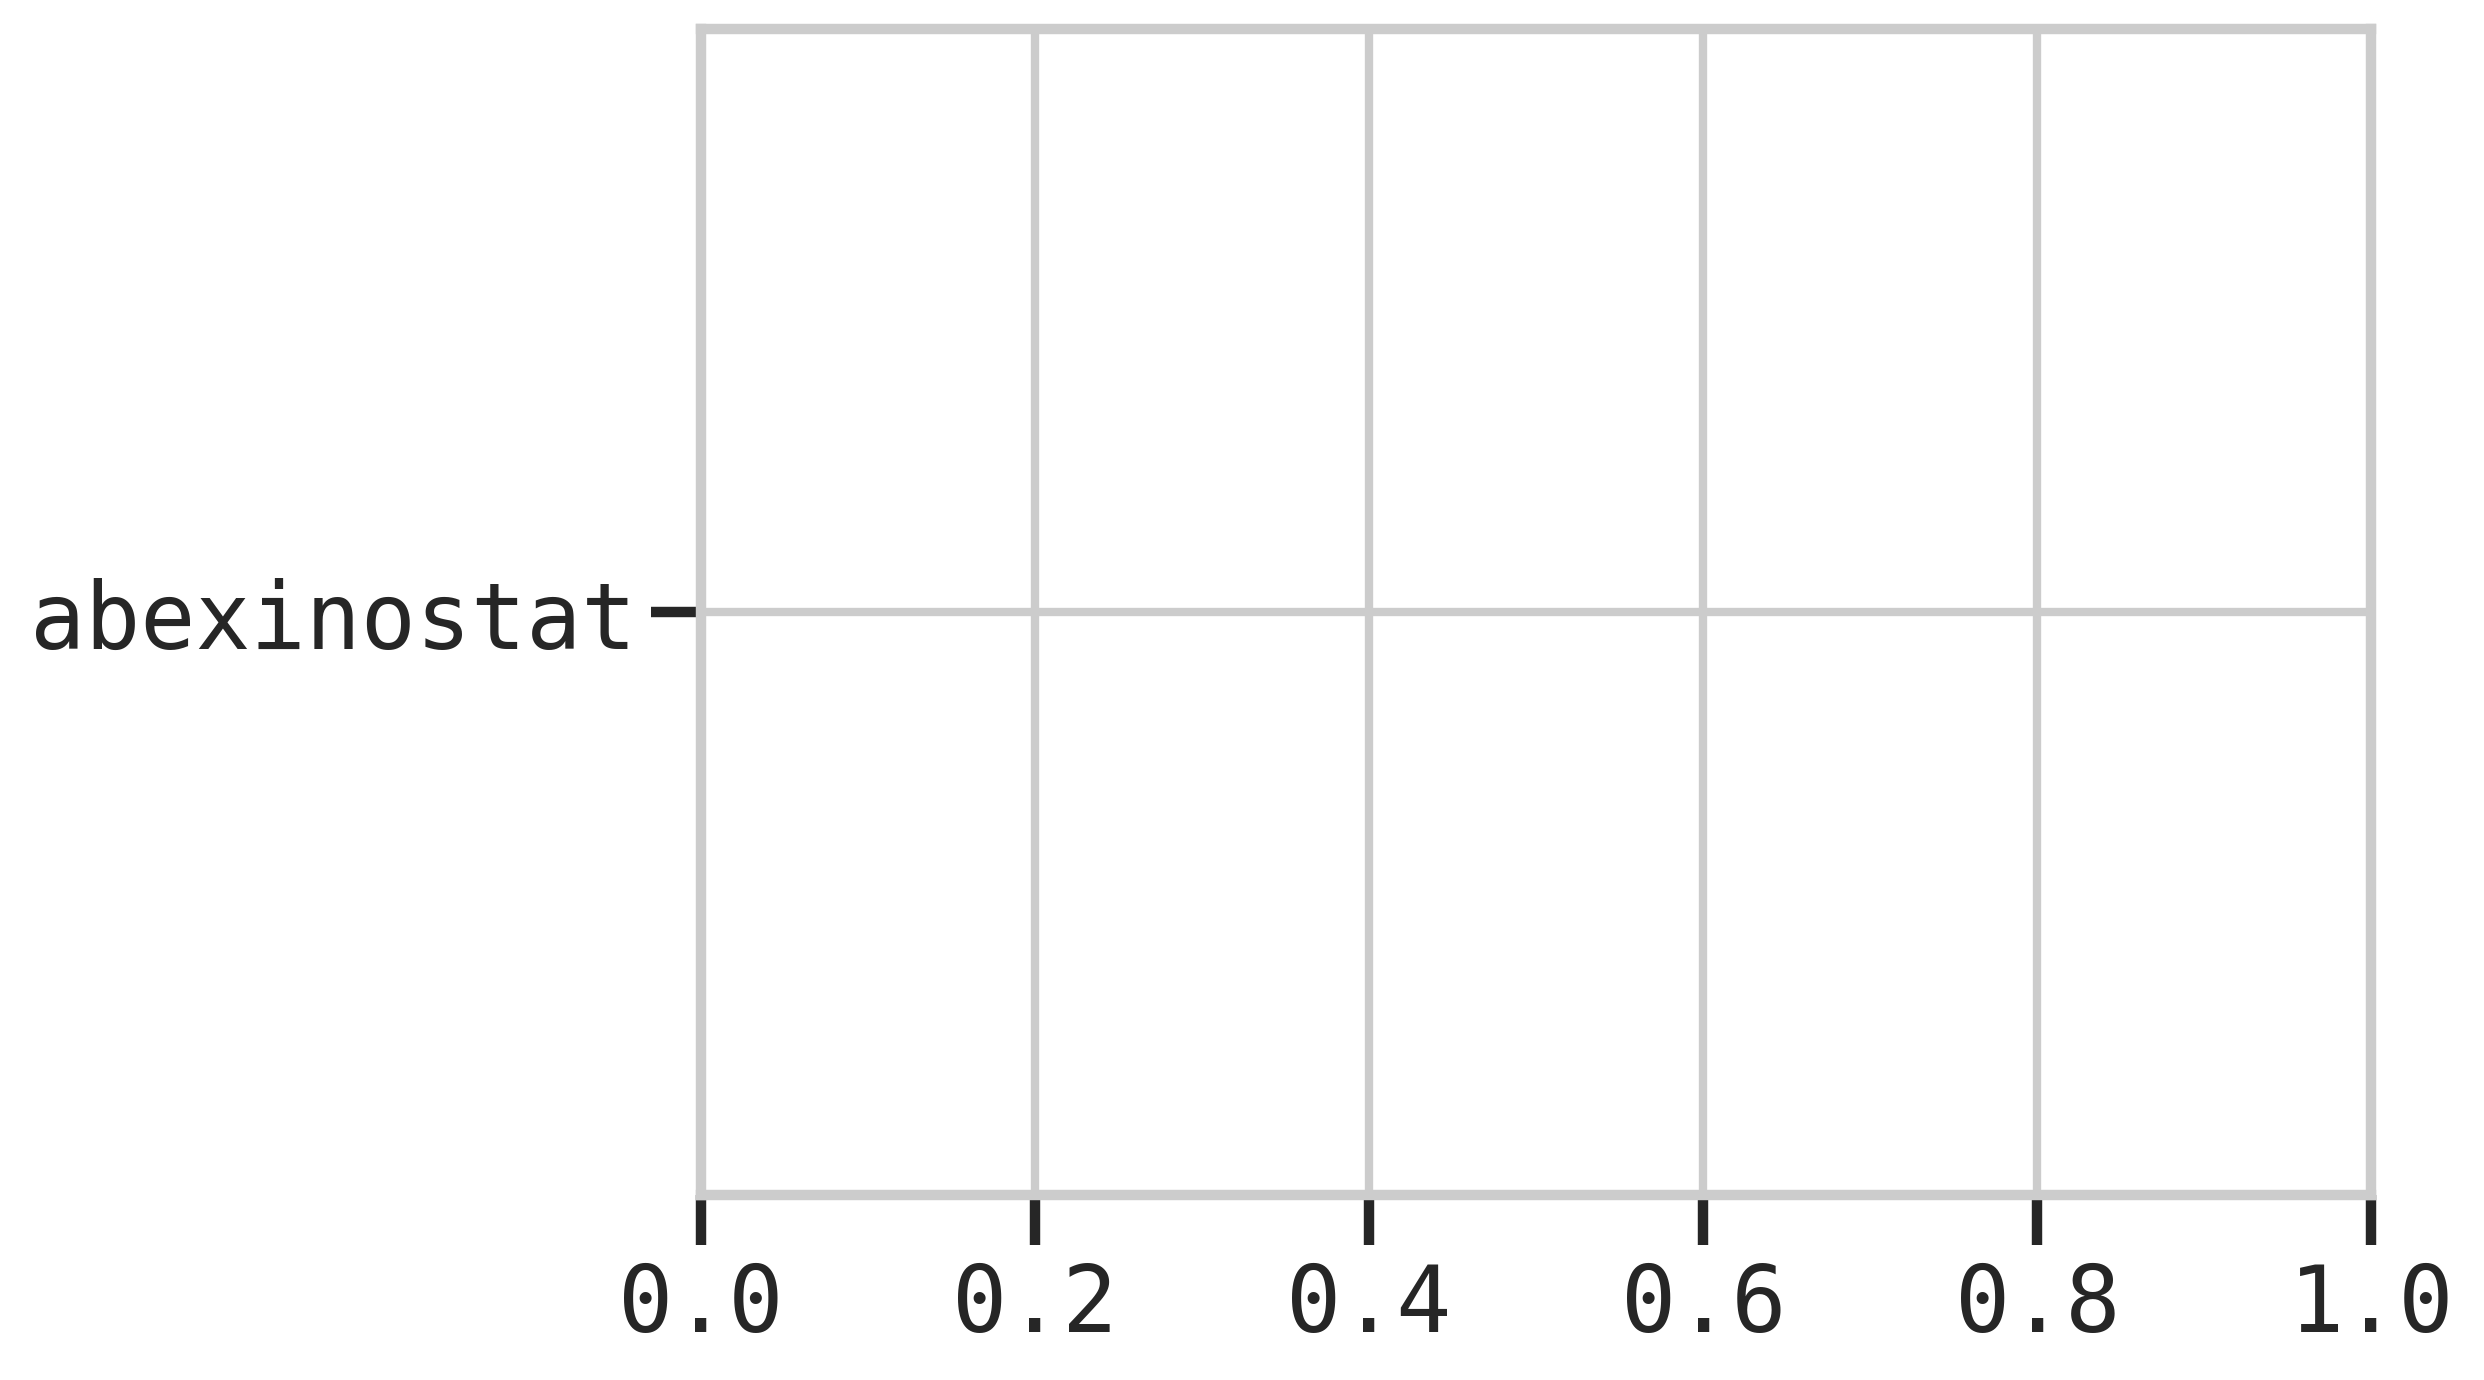

In [24]:
plt_data = sel_res[sel_res["embedding"]=="moa"]
sns.boxplot(data=plt_data, y="drug", x="mean_r2", hue="drug_dist", order=plt_data.sort_values("drug_dist")["drug"])
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("MoA, avg. drug distance, R2", fontsize=14)
plt.show()

plt_data = sel_res[sel_res["embedding"]=="moa"]
sns.boxplot(data=plt_data, y="drug", x="mean_wasserstein", hue="drug_dist", order=plt_data.sort_values("drug_dist")["drug"])
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("MoA, avg. drug distance, wasserstein", fontsize=14)
plt.show()

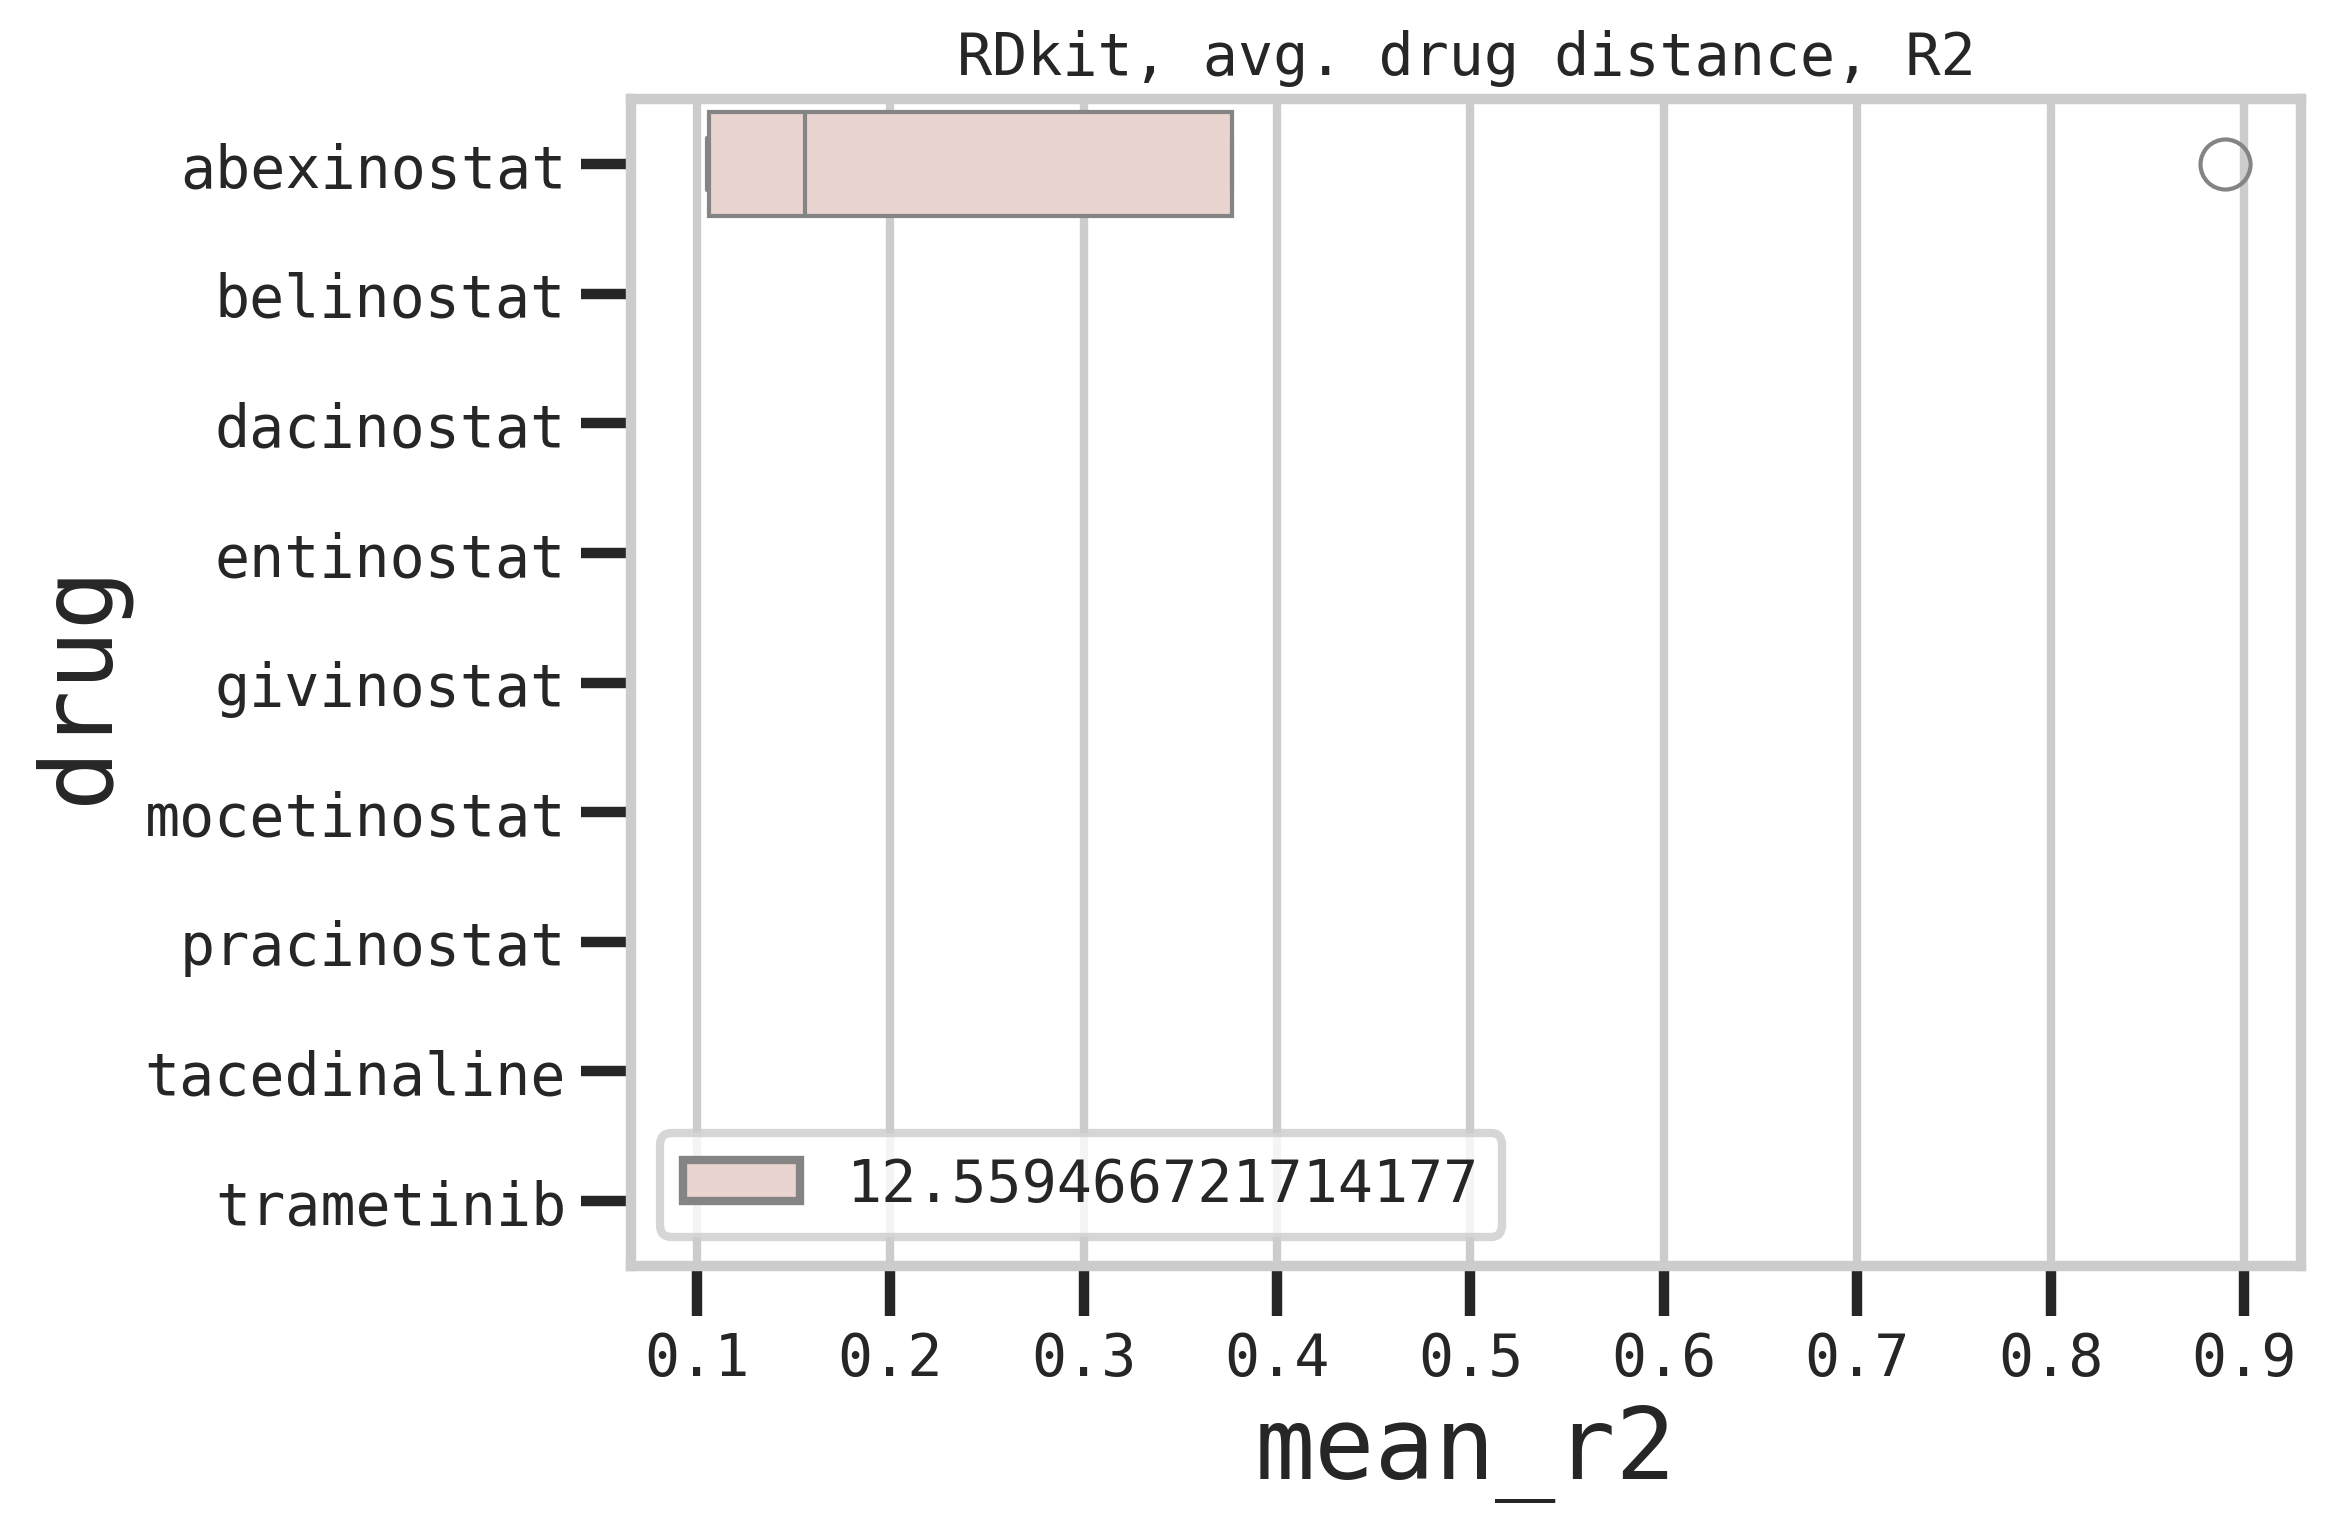

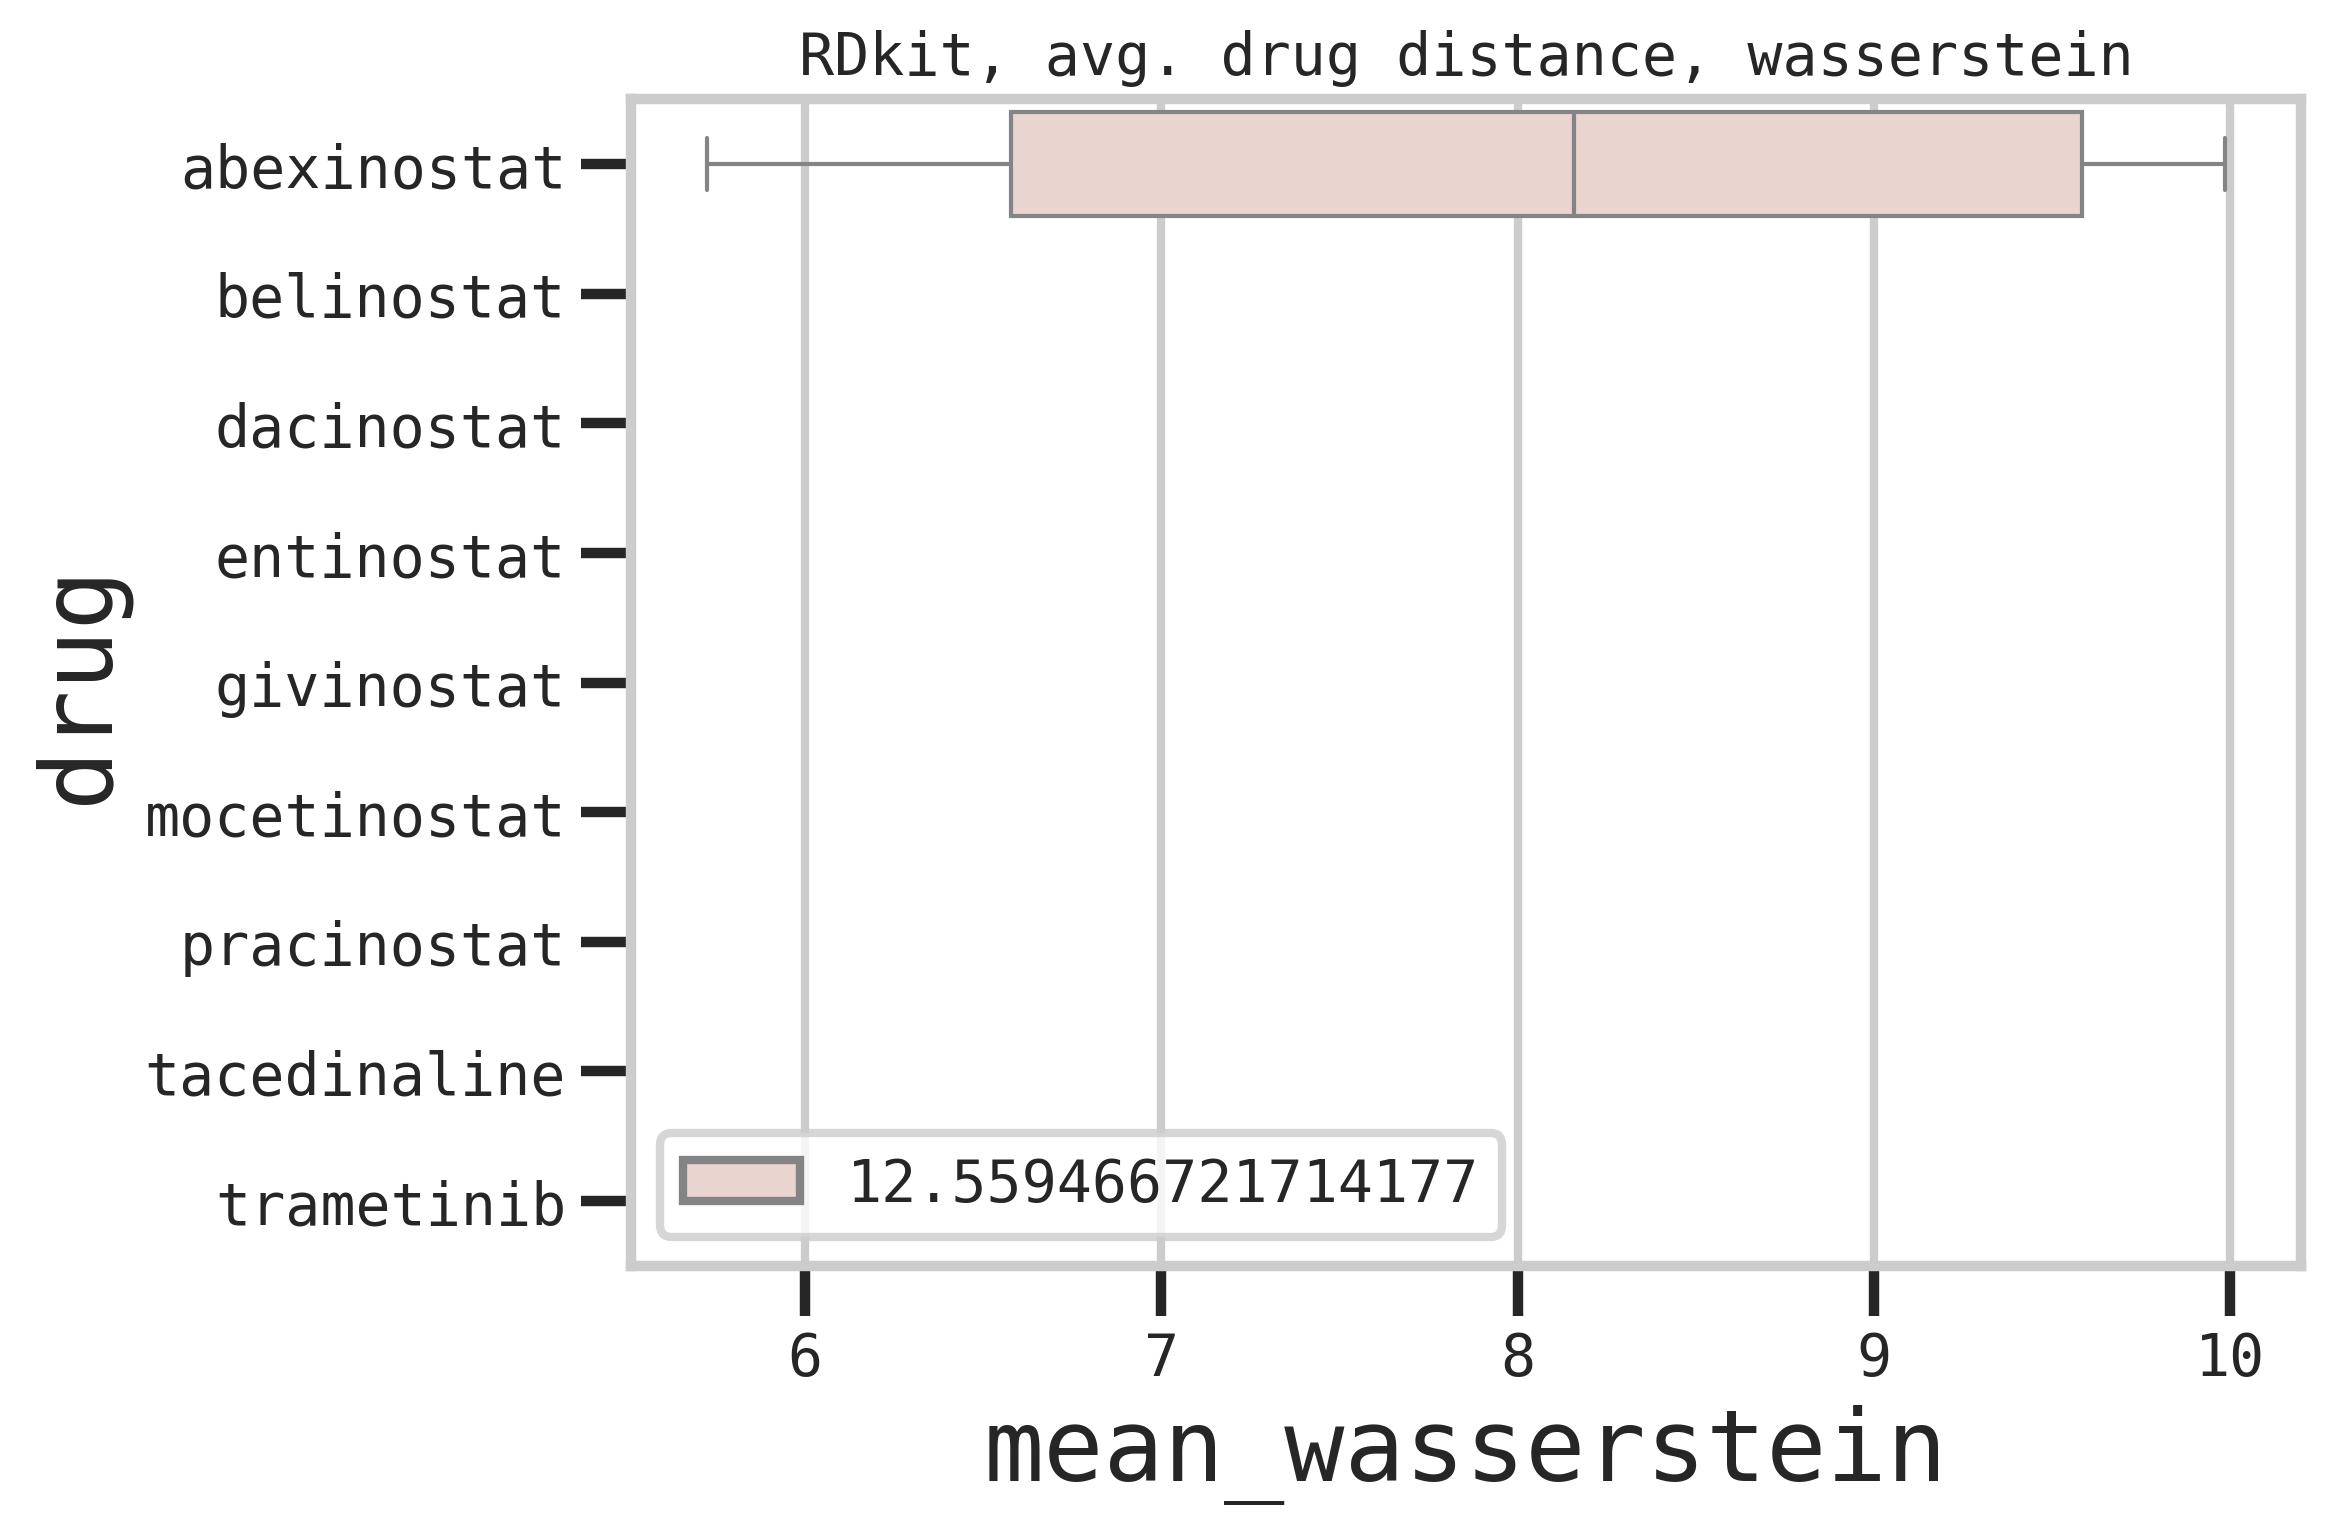

In [25]:
plt_data = sel_res[sel_res["embedding"]=="rdkit"]
sns.boxplot(data=plt_data, y="drug", x="mean_r2", hue="drug_dist", order=plt_data.sort_values("drug_dist")["drug"])
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("RDkit, avg. drug distance, R2", fontsize=14)
plt.show()

plt_data = sel_res[sel_res["embedding"]=="rdkit"]
sns.boxplot(data=plt_data, y="drug", x="mean_wasserstein", hue="drug_dist", order=plt_data.sort_values("drug_dist")["drug"])
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("RDkit, avg. drug distance, wasserstein", fontsize=14)
plt.show()

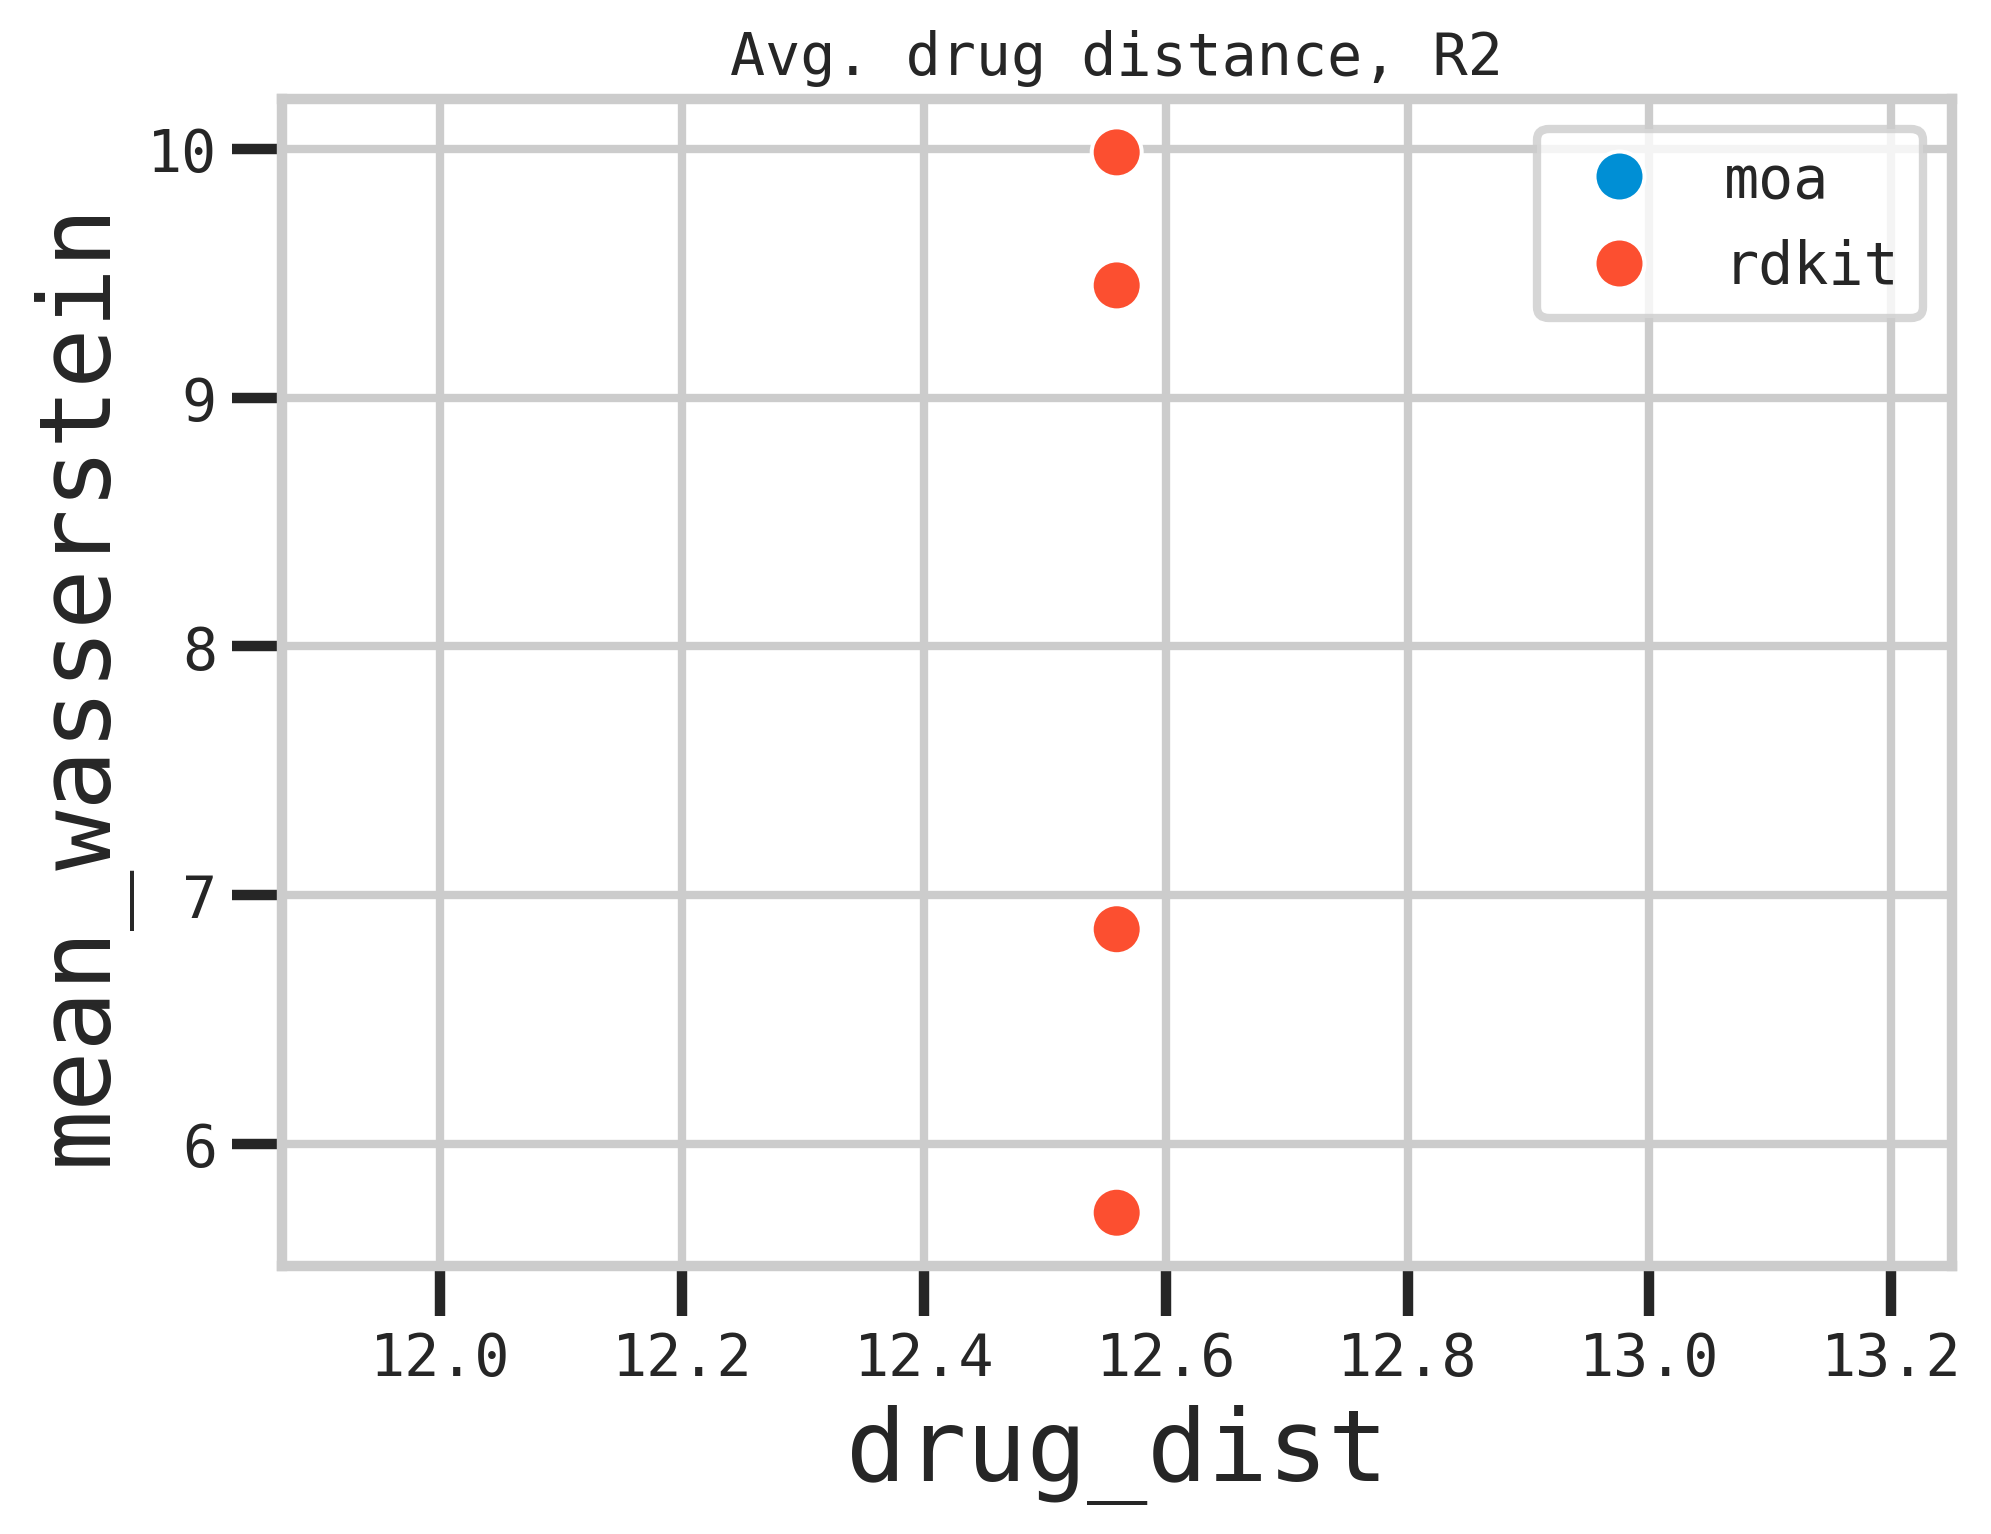

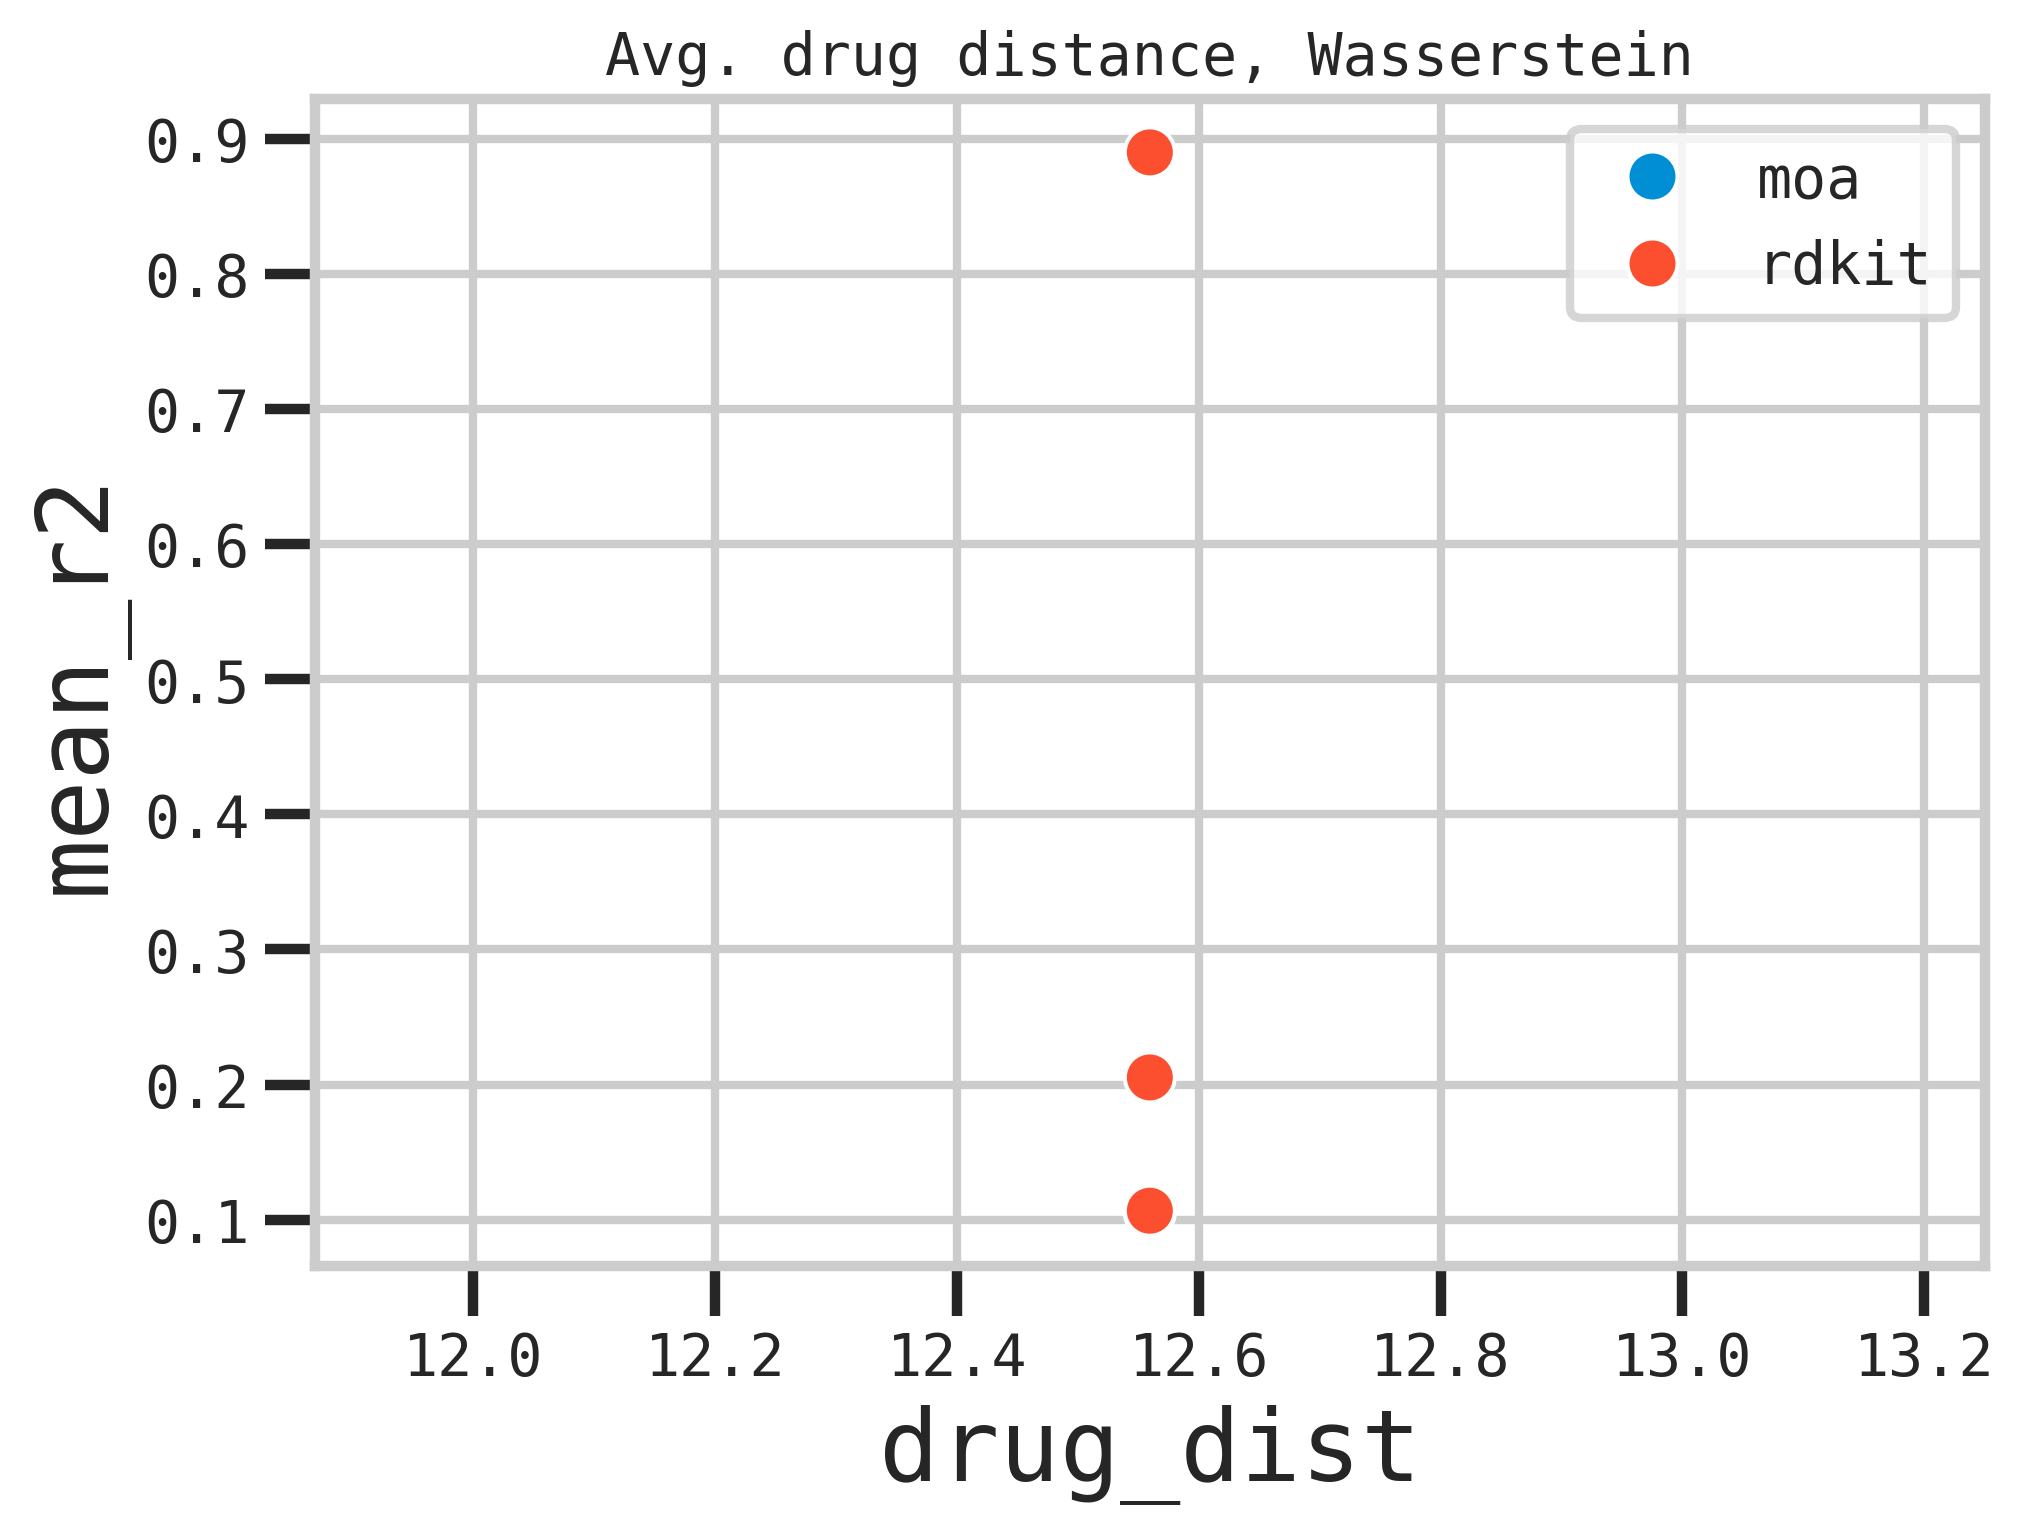

In [26]:
sns.scatterplot(data=sel_res, x="drug_dist", y="mean_wasserstein", hue="embedding")
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("Avg. drug distance, R2", fontsize=14)
plt.show()

sns.scatterplot(data=sel_res, x="drug_dist", y="mean_r2", hue="embedding")
plt.tick_params(which="both", axis="both", labelsize=14)
plt.legend(fontsize=14)
plt.title("Avg. drug distance, Wasserstein", fontsize=14)
plt.show()

(-0.5, 1.5)

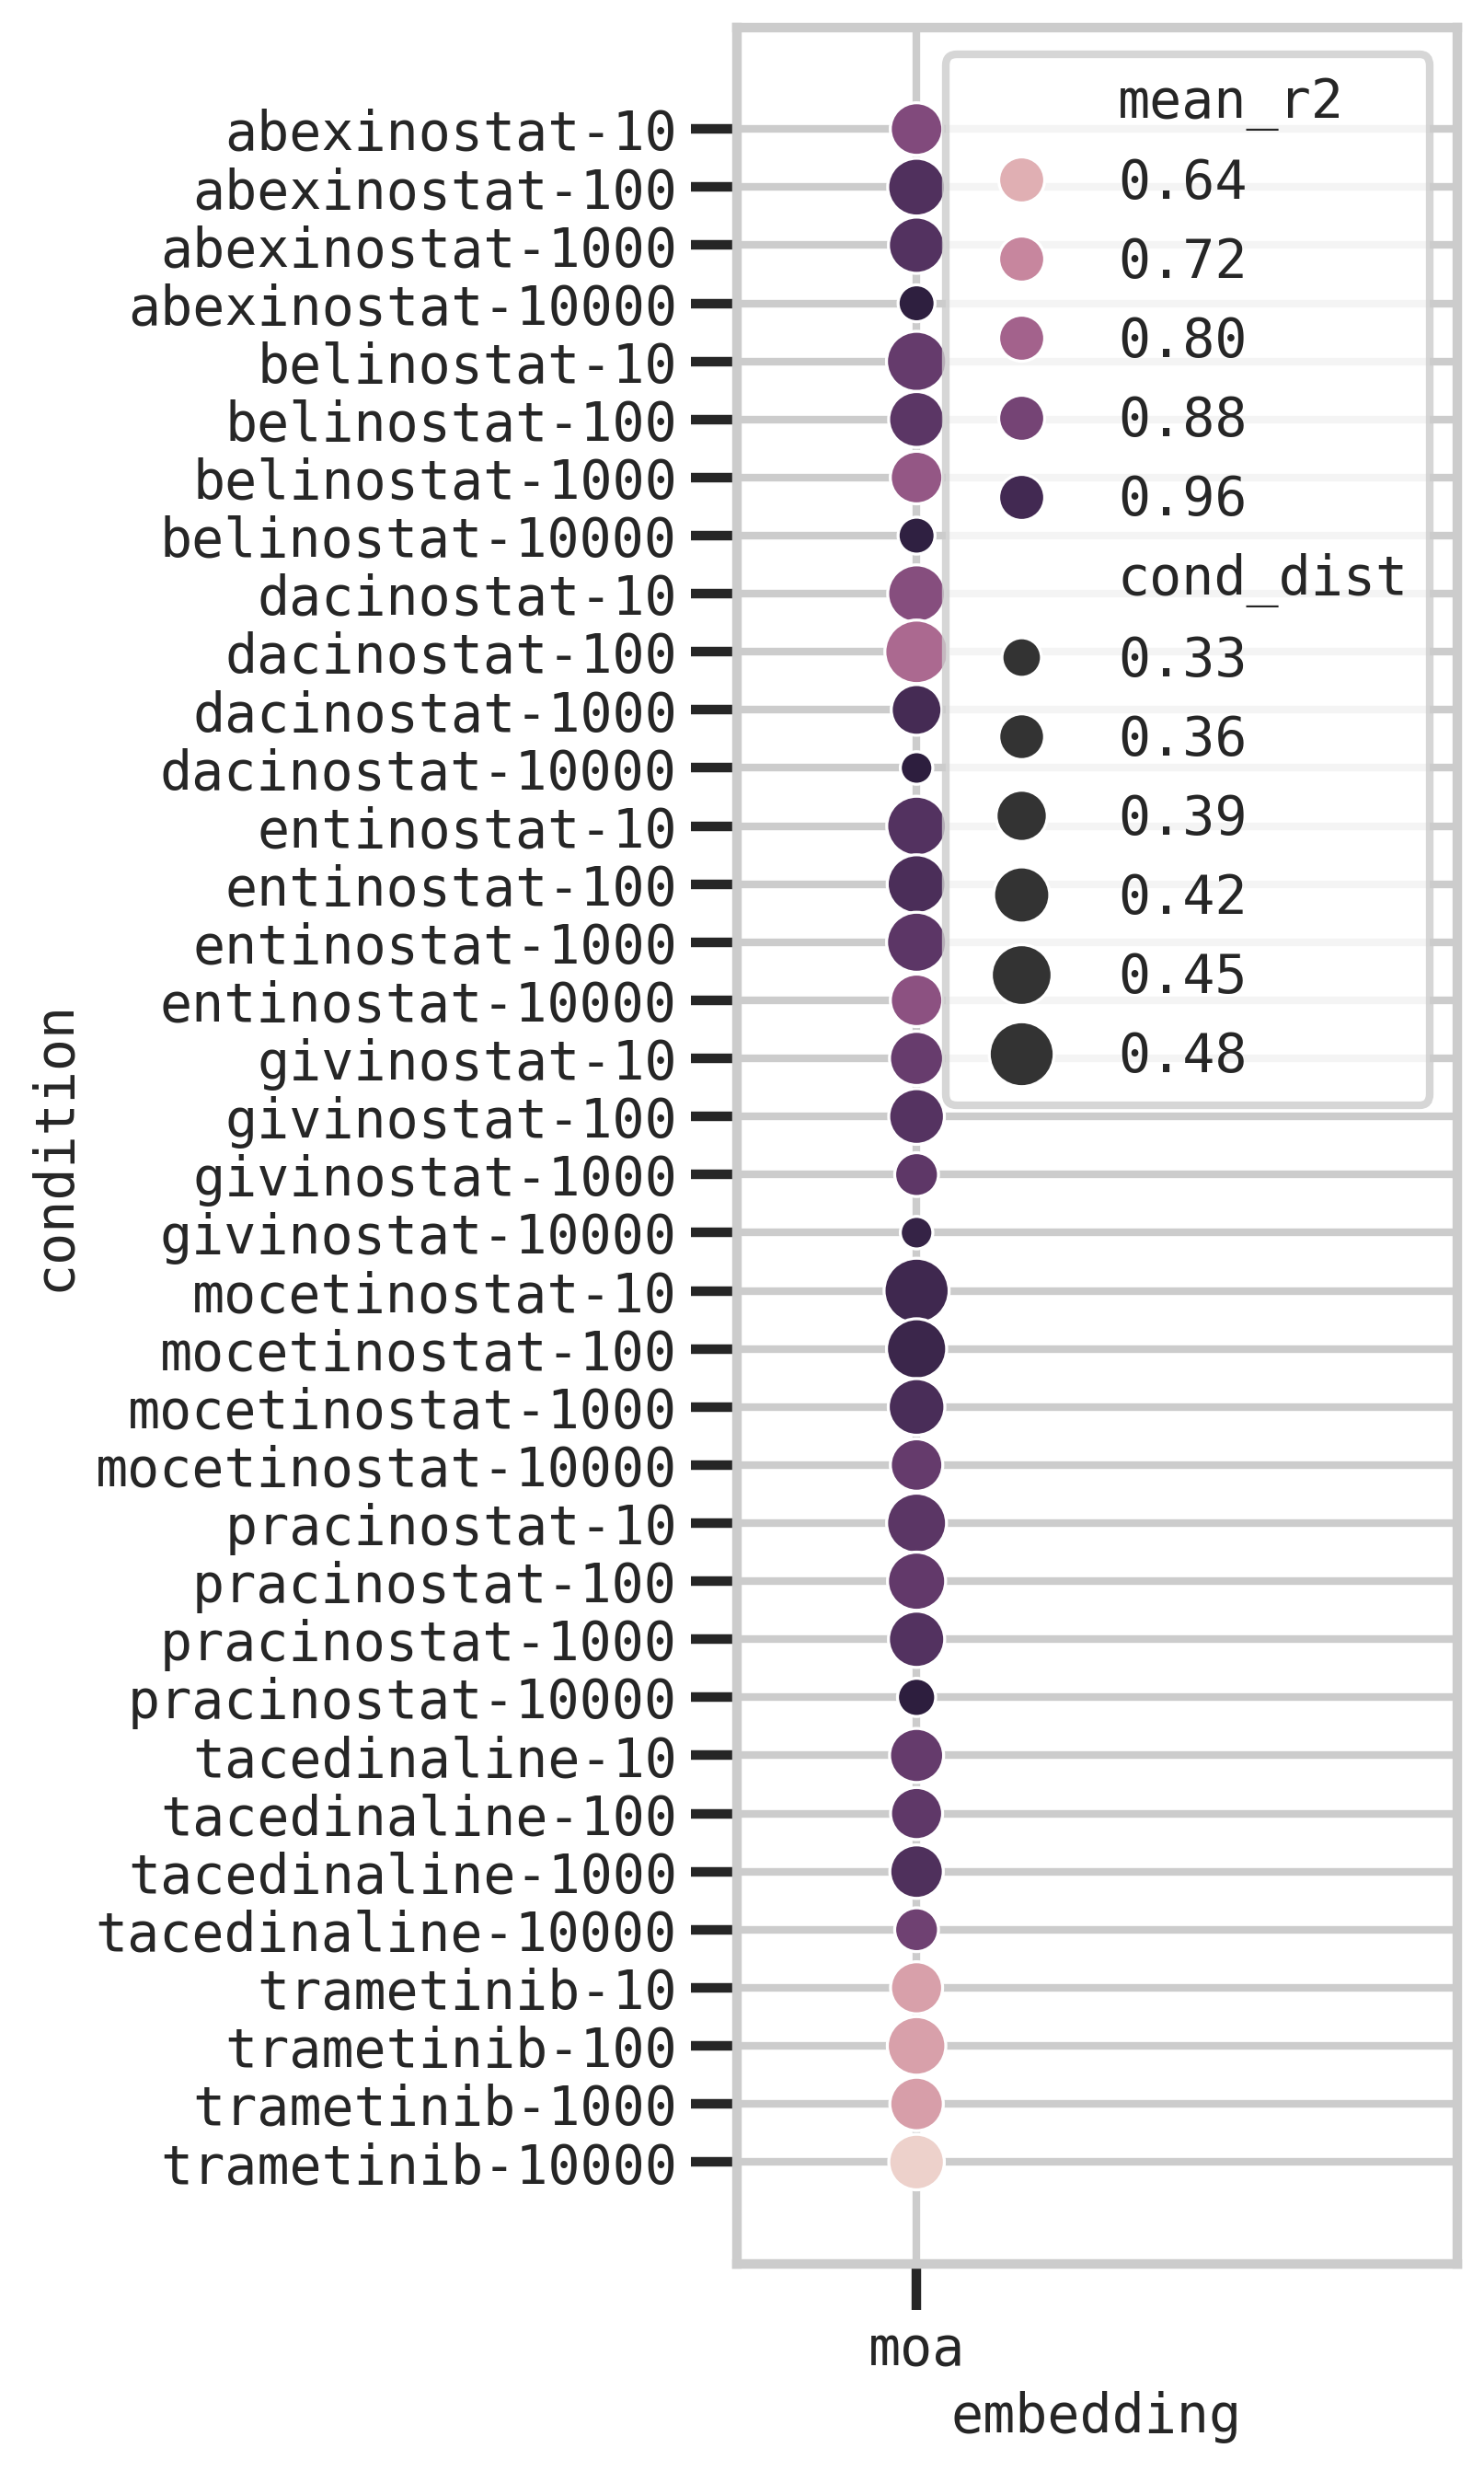

In [27]:
plt.figure(figsize=(3,10))
sns.scatterplot(data=sel_res[sel_res["embedding"]=="moa"], x="embedding", y="condition", hue="mean_r2", size="cond_dist")
plt.legend(fontsize=14, bbox_to_anchor=(1,1))
plt.xlabel("embedding", fontsize=14)
plt.ylabel("condition", fontsize=14)
plt.tick_params(which="both", axis="both", labelsize=14)
plt.xlim((-.5,1.5))

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58134/1219811866.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14, bbox_to_anchor=(1,1))


(-0.5, 1.5)

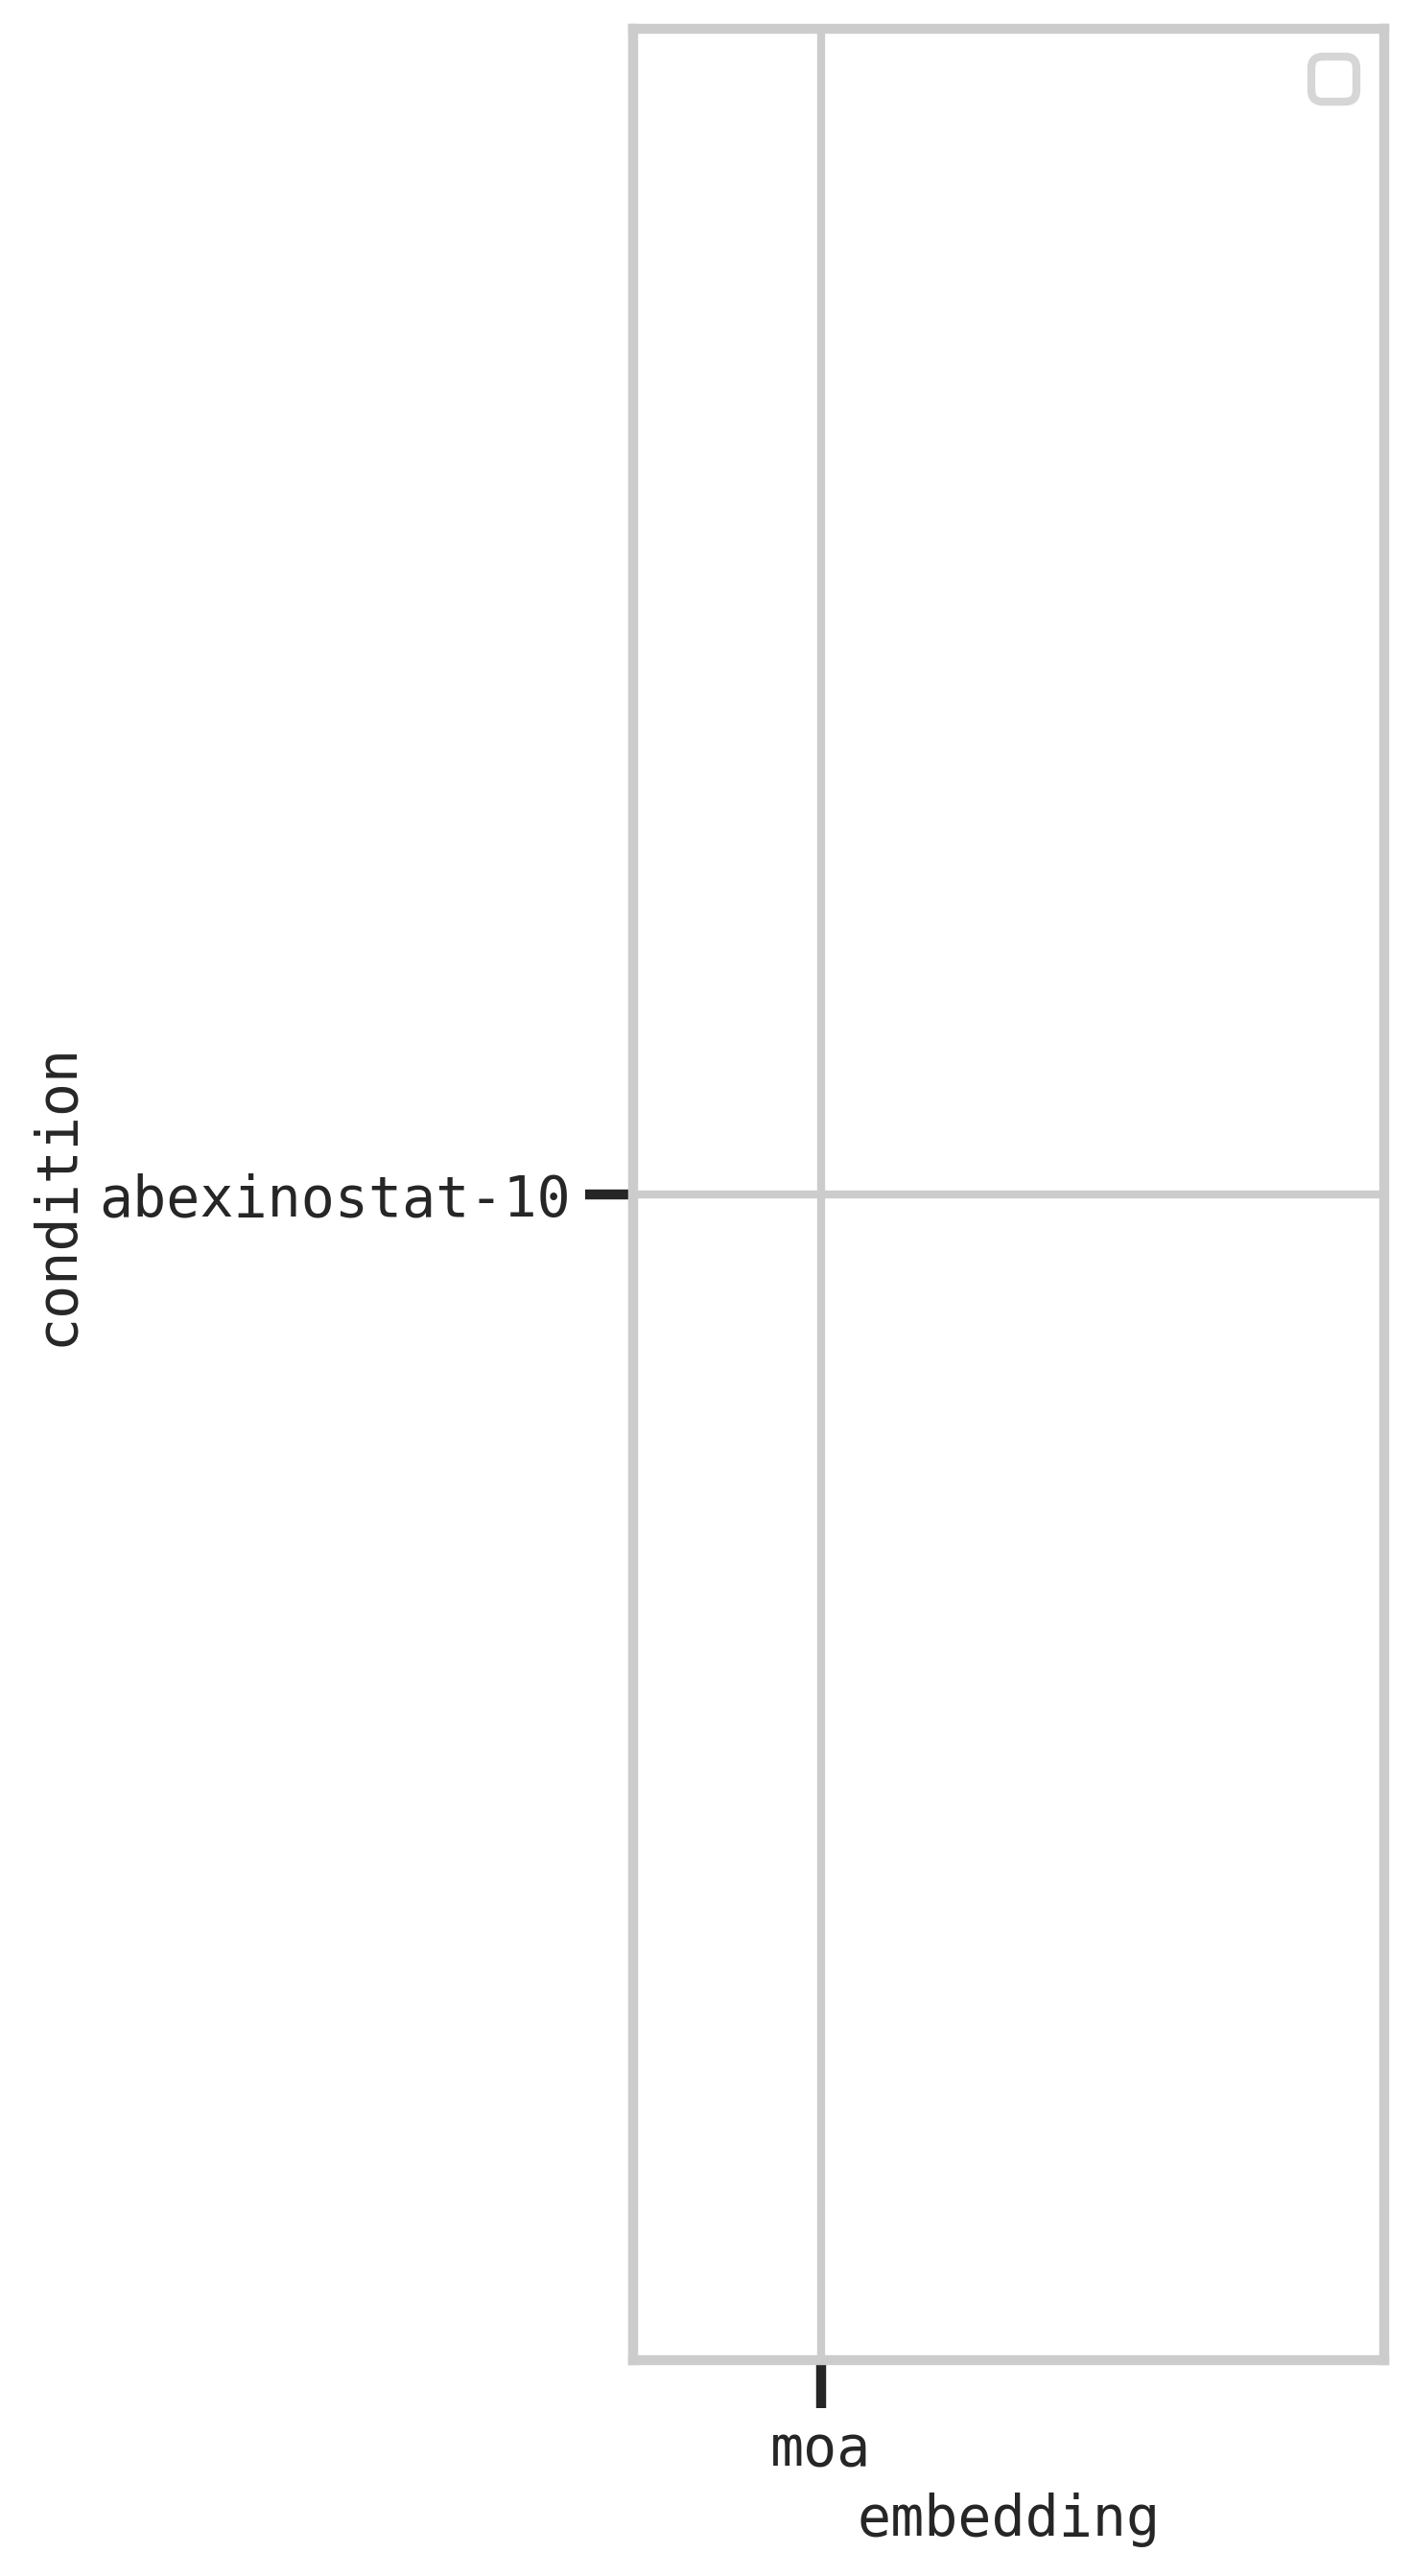

In [28]:
plt.figure(figsize=(3,10))
sns.scatterplot(data=sel_res[sel_res["embedding"]=="moa"], x="embedding", y="condition", hue="mean_r2", size="drug_dist")
plt.legend(fontsize=14, bbox_to_anchor=(1,1))
plt.xlabel("embedding", fontsize=14)
plt.ylabel("condition", fontsize=14)
plt.tick_params(which="both", axis="both", labelsize=14)
plt.xlim((-.5,1.5))

/var/folders/02/gztwz1tj1051mtt_ykv6v7940000gn/T/ipykernel_58134/177044143.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=14, bbox_to_anchor=(1,1))


(-0.5, 1.5)

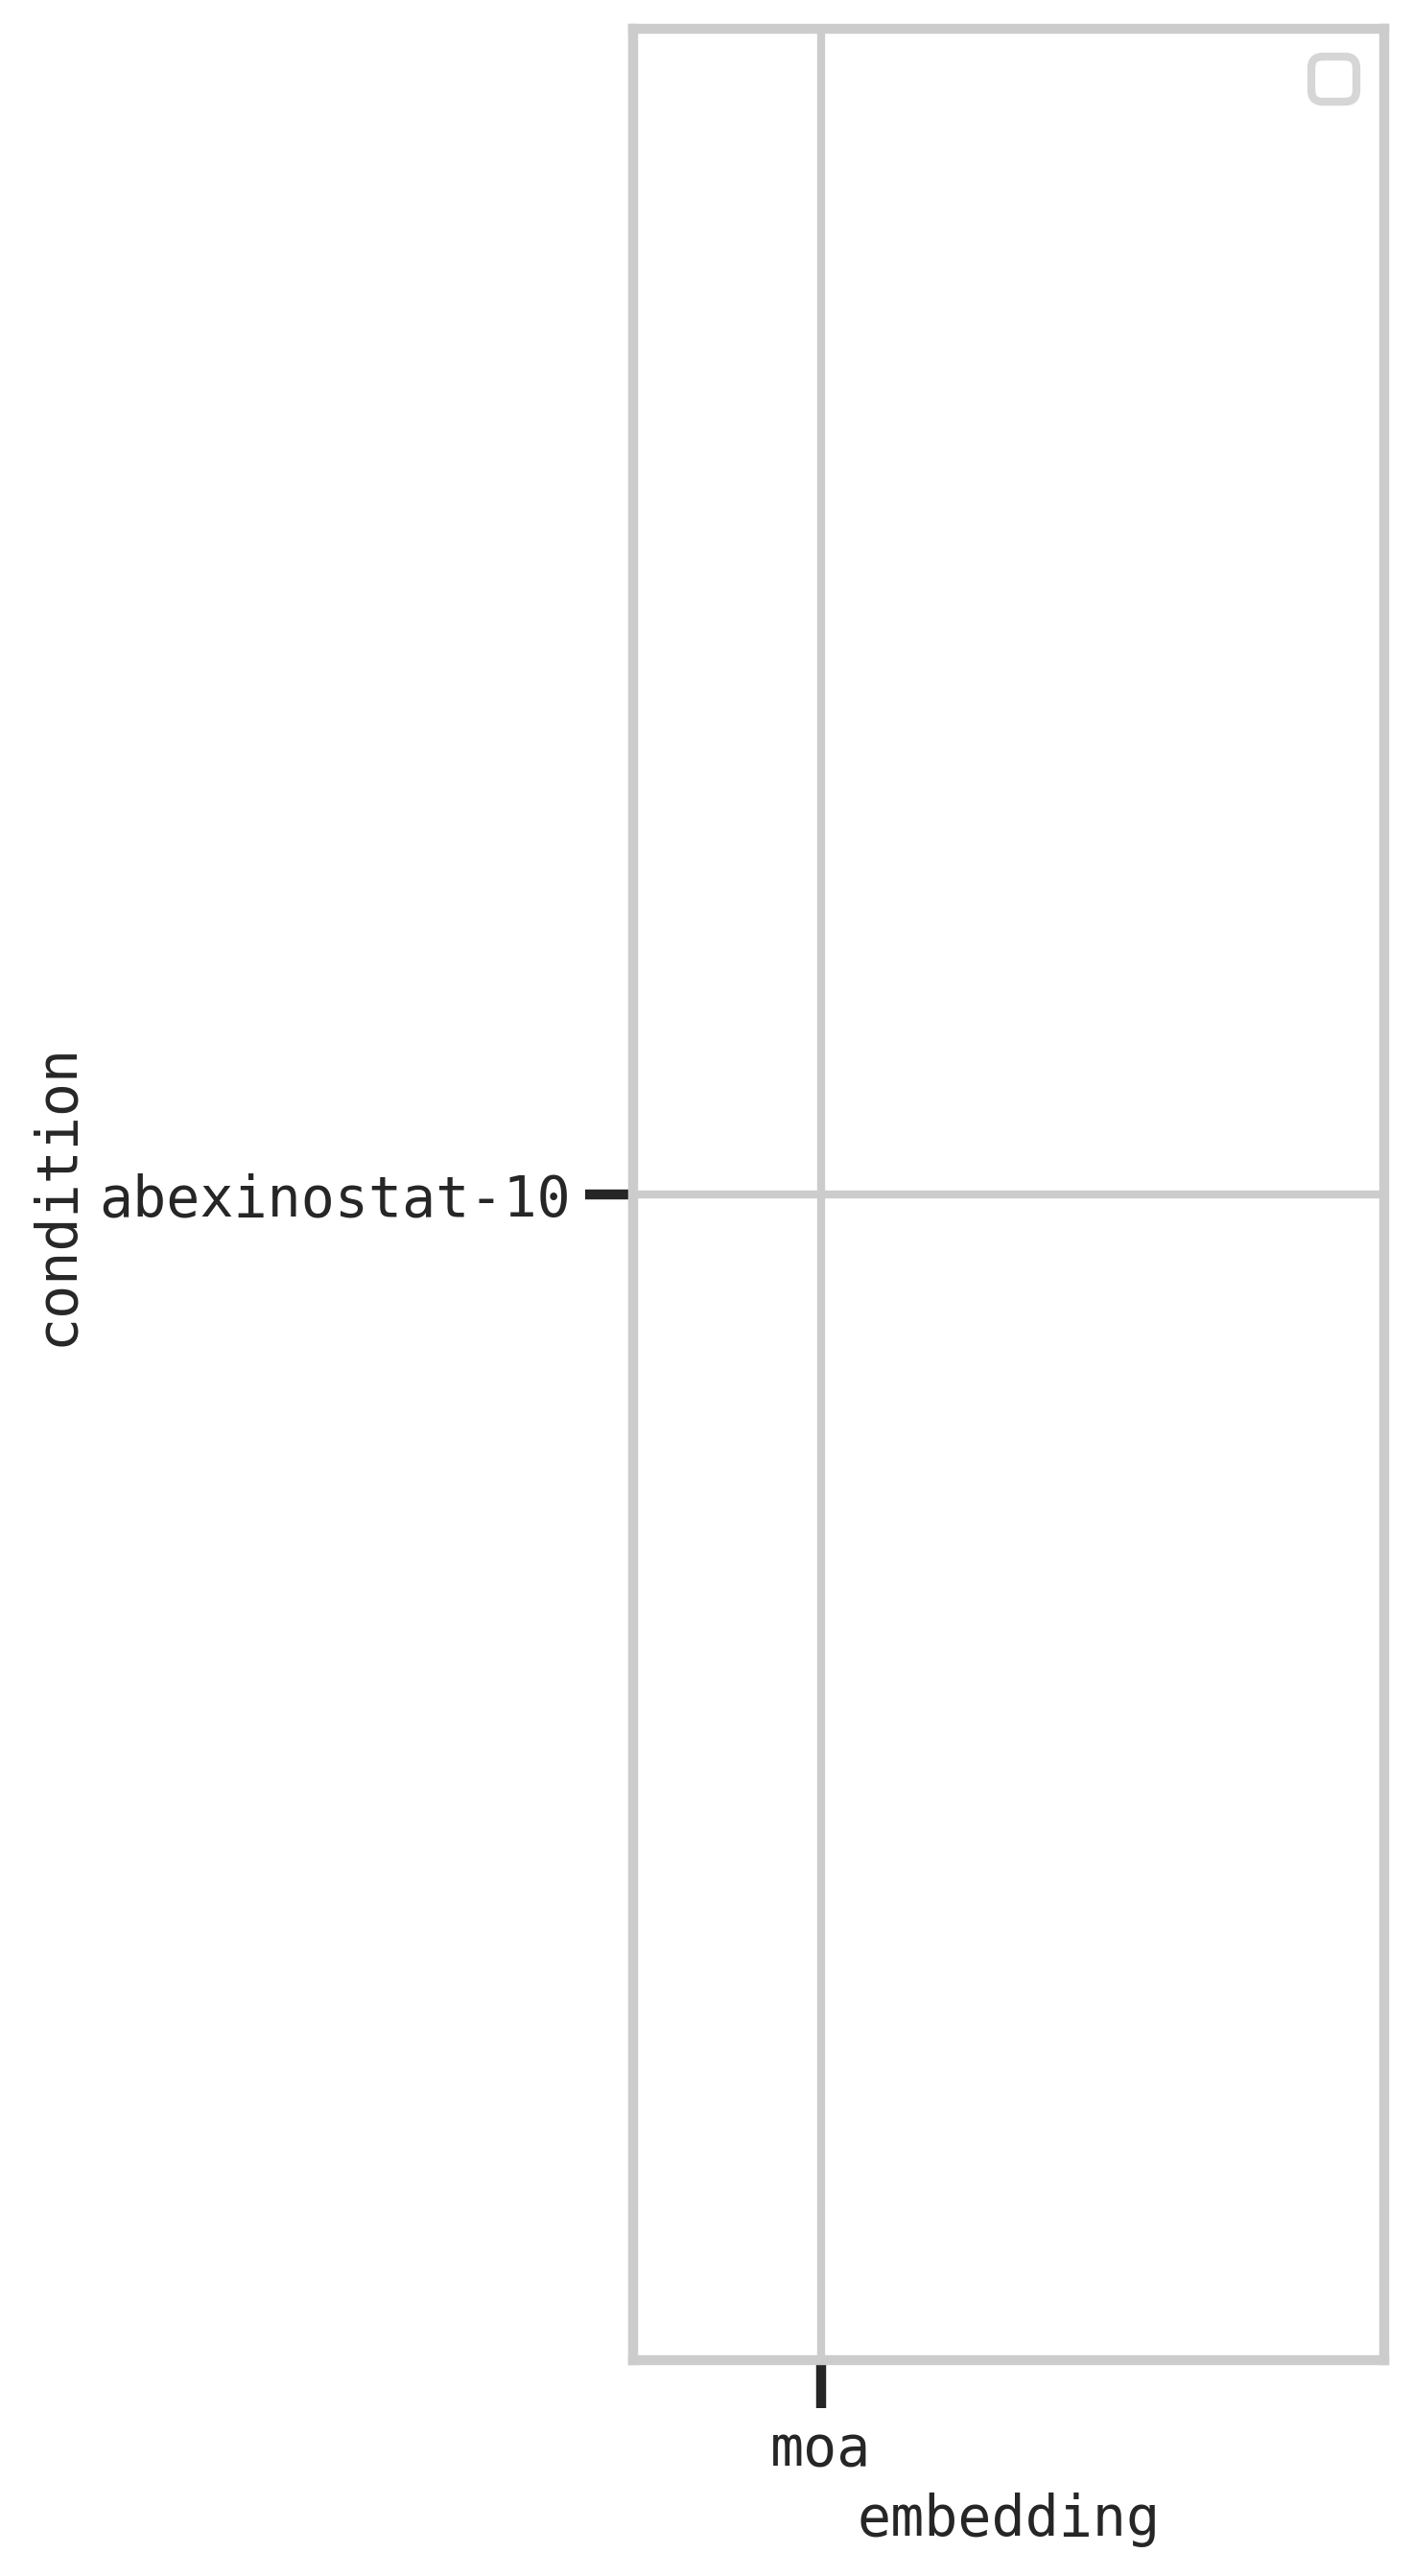

In [29]:
plt.figure(figsize=(3,10))
sns.scatterplot(data=sel_res[sel_res["embedding"]=="moa"], x="embedding", y="condition", hue="mean_wasserstein", size="drug_dist")
plt.legend(fontsize=14, bbox_to_anchor=(1,1))
plt.xlabel("embedding", fontsize=14)
plt.ylabel("condition", fontsize=14)
plt.tick_params(which="both", axis="both", labelsize=14)
plt.xlim((-.5,1.5))

(-0.5, 1.5)

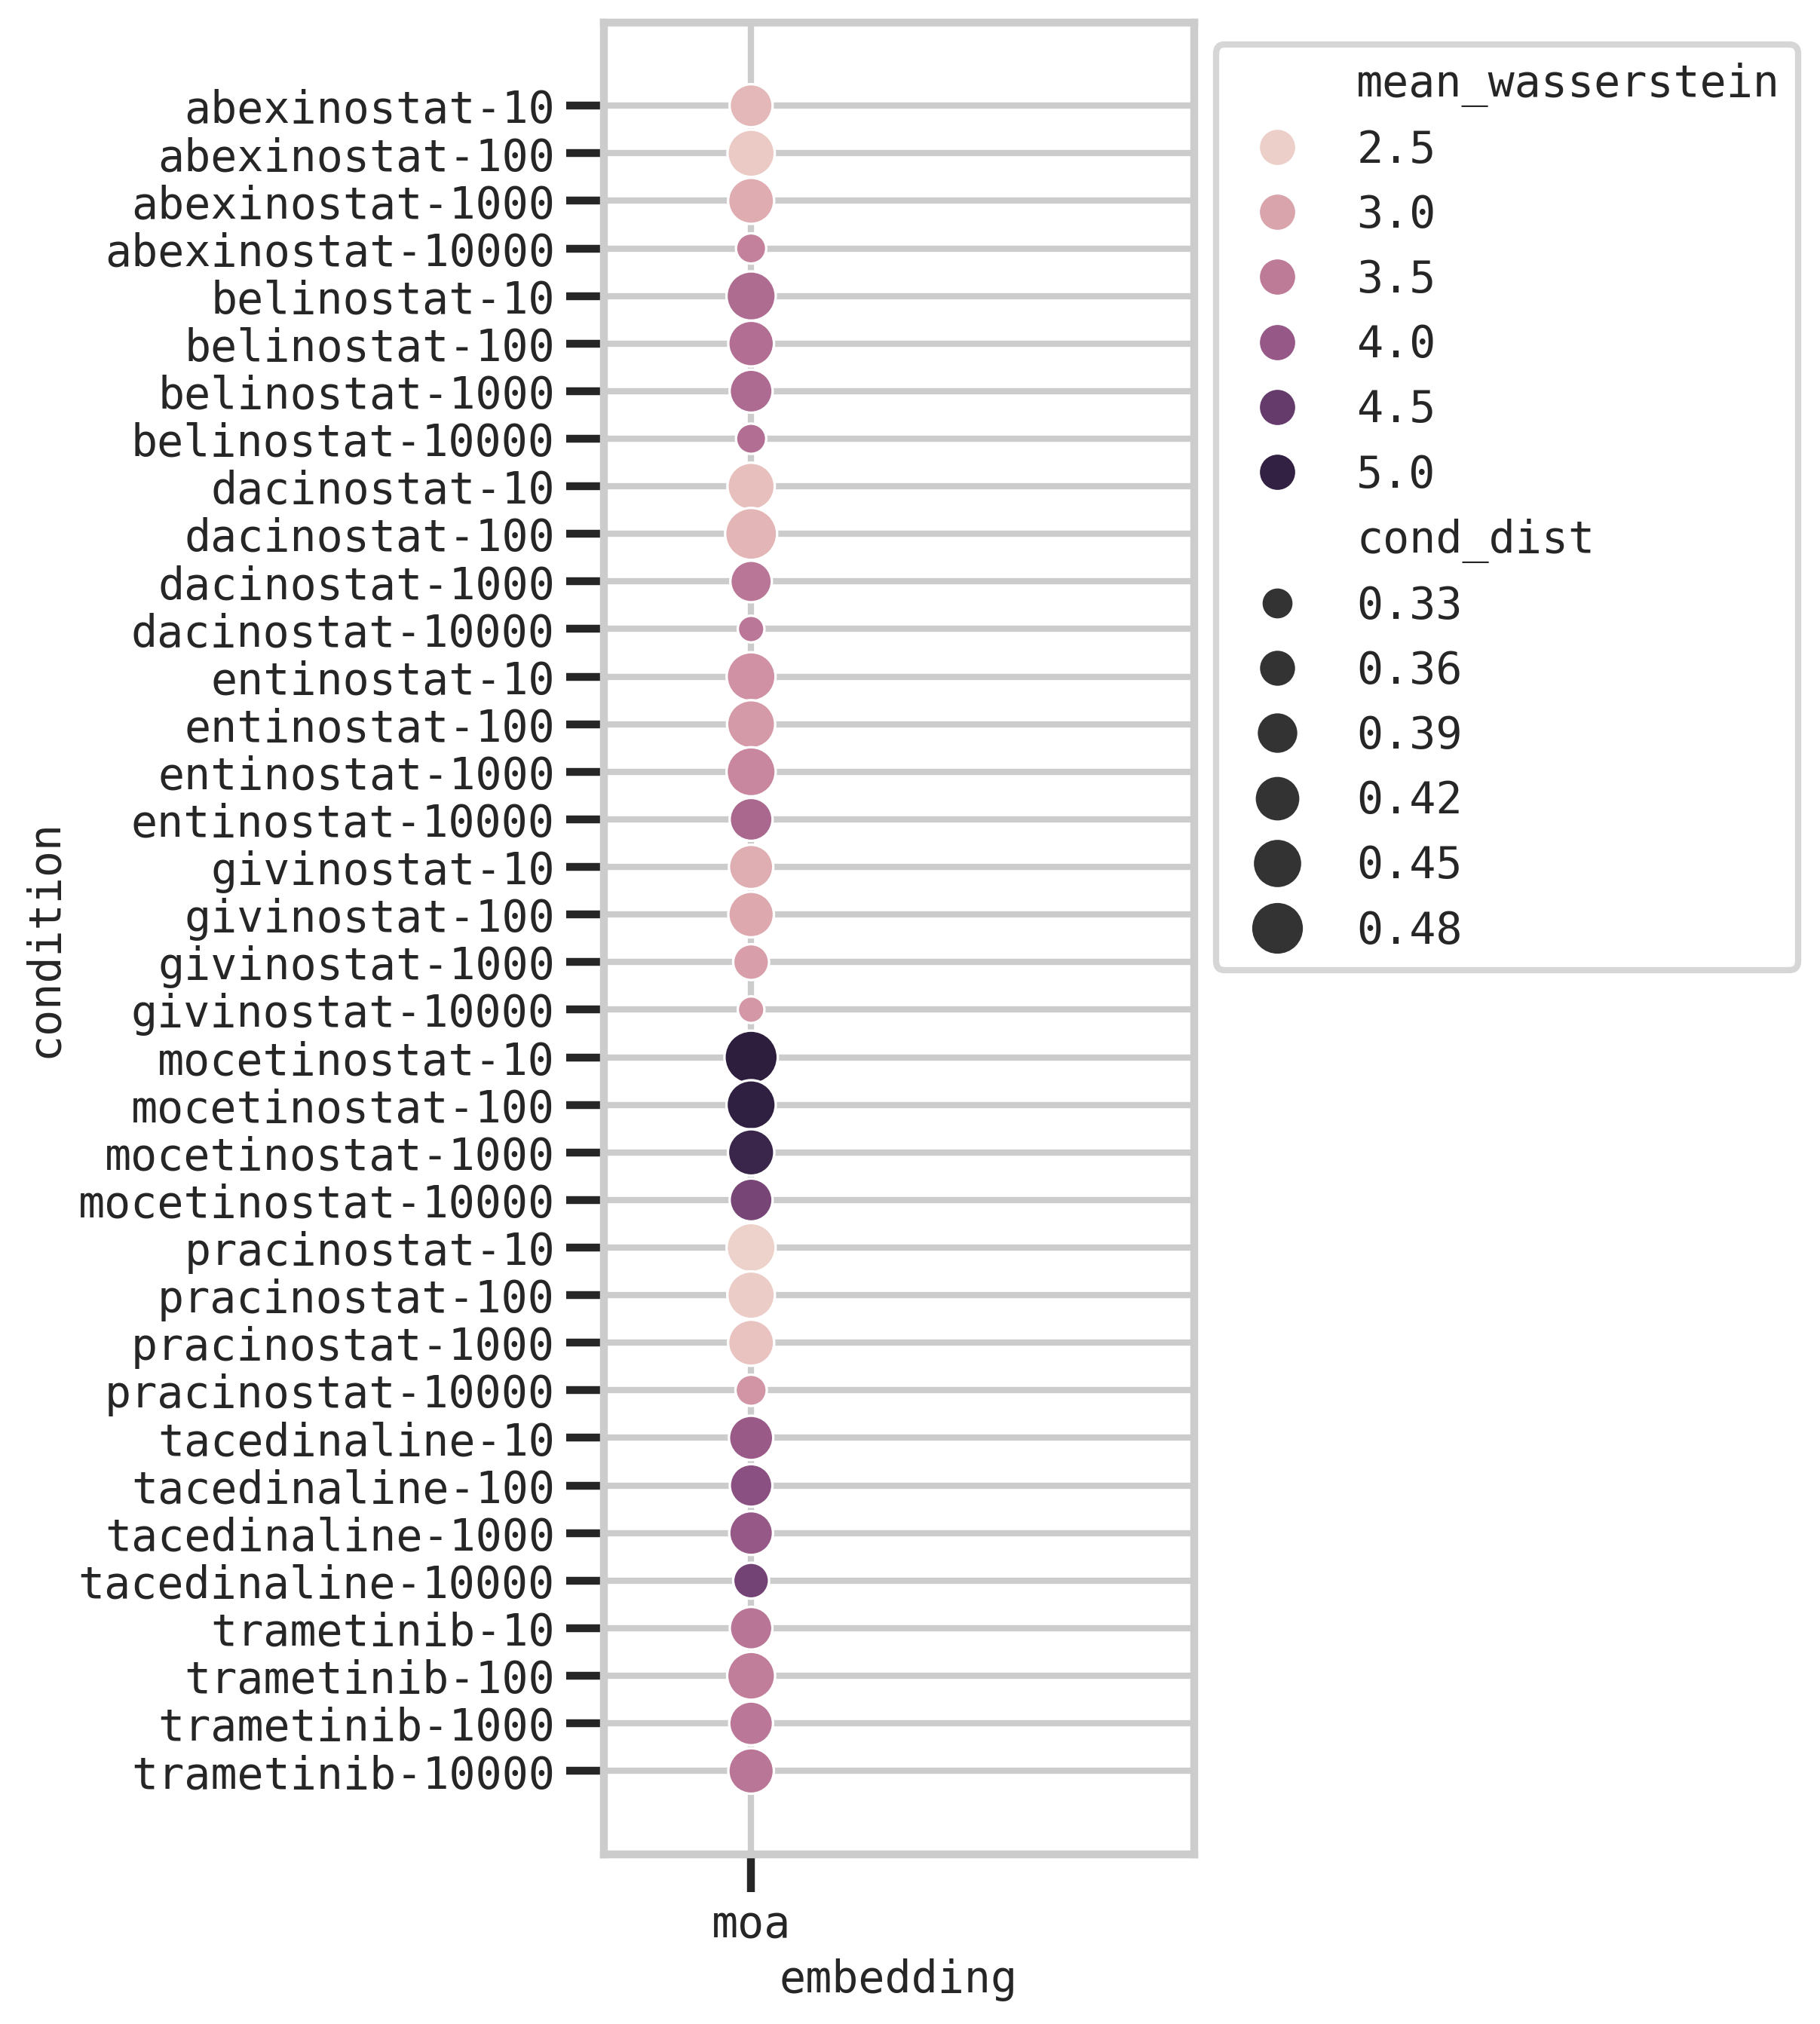

In [30]:
plt.figure(figsize=(3,10))
sns.scatterplot(data=sel_res[sel_res["embedding"]=="moa"], x="embedding", y="condition", hue="mean_wasserstein", size="cond_dist")
plt.legend(fontsize=14, bbox_to_anchor=(1,1))
plt.xlabel("embedding", fontsize=14)
plt.ylabel("condition", fontsize=14)
plt.tick_params(which="both", axis="both", labelsize=14)
plt.xlim((-.5,1.5))

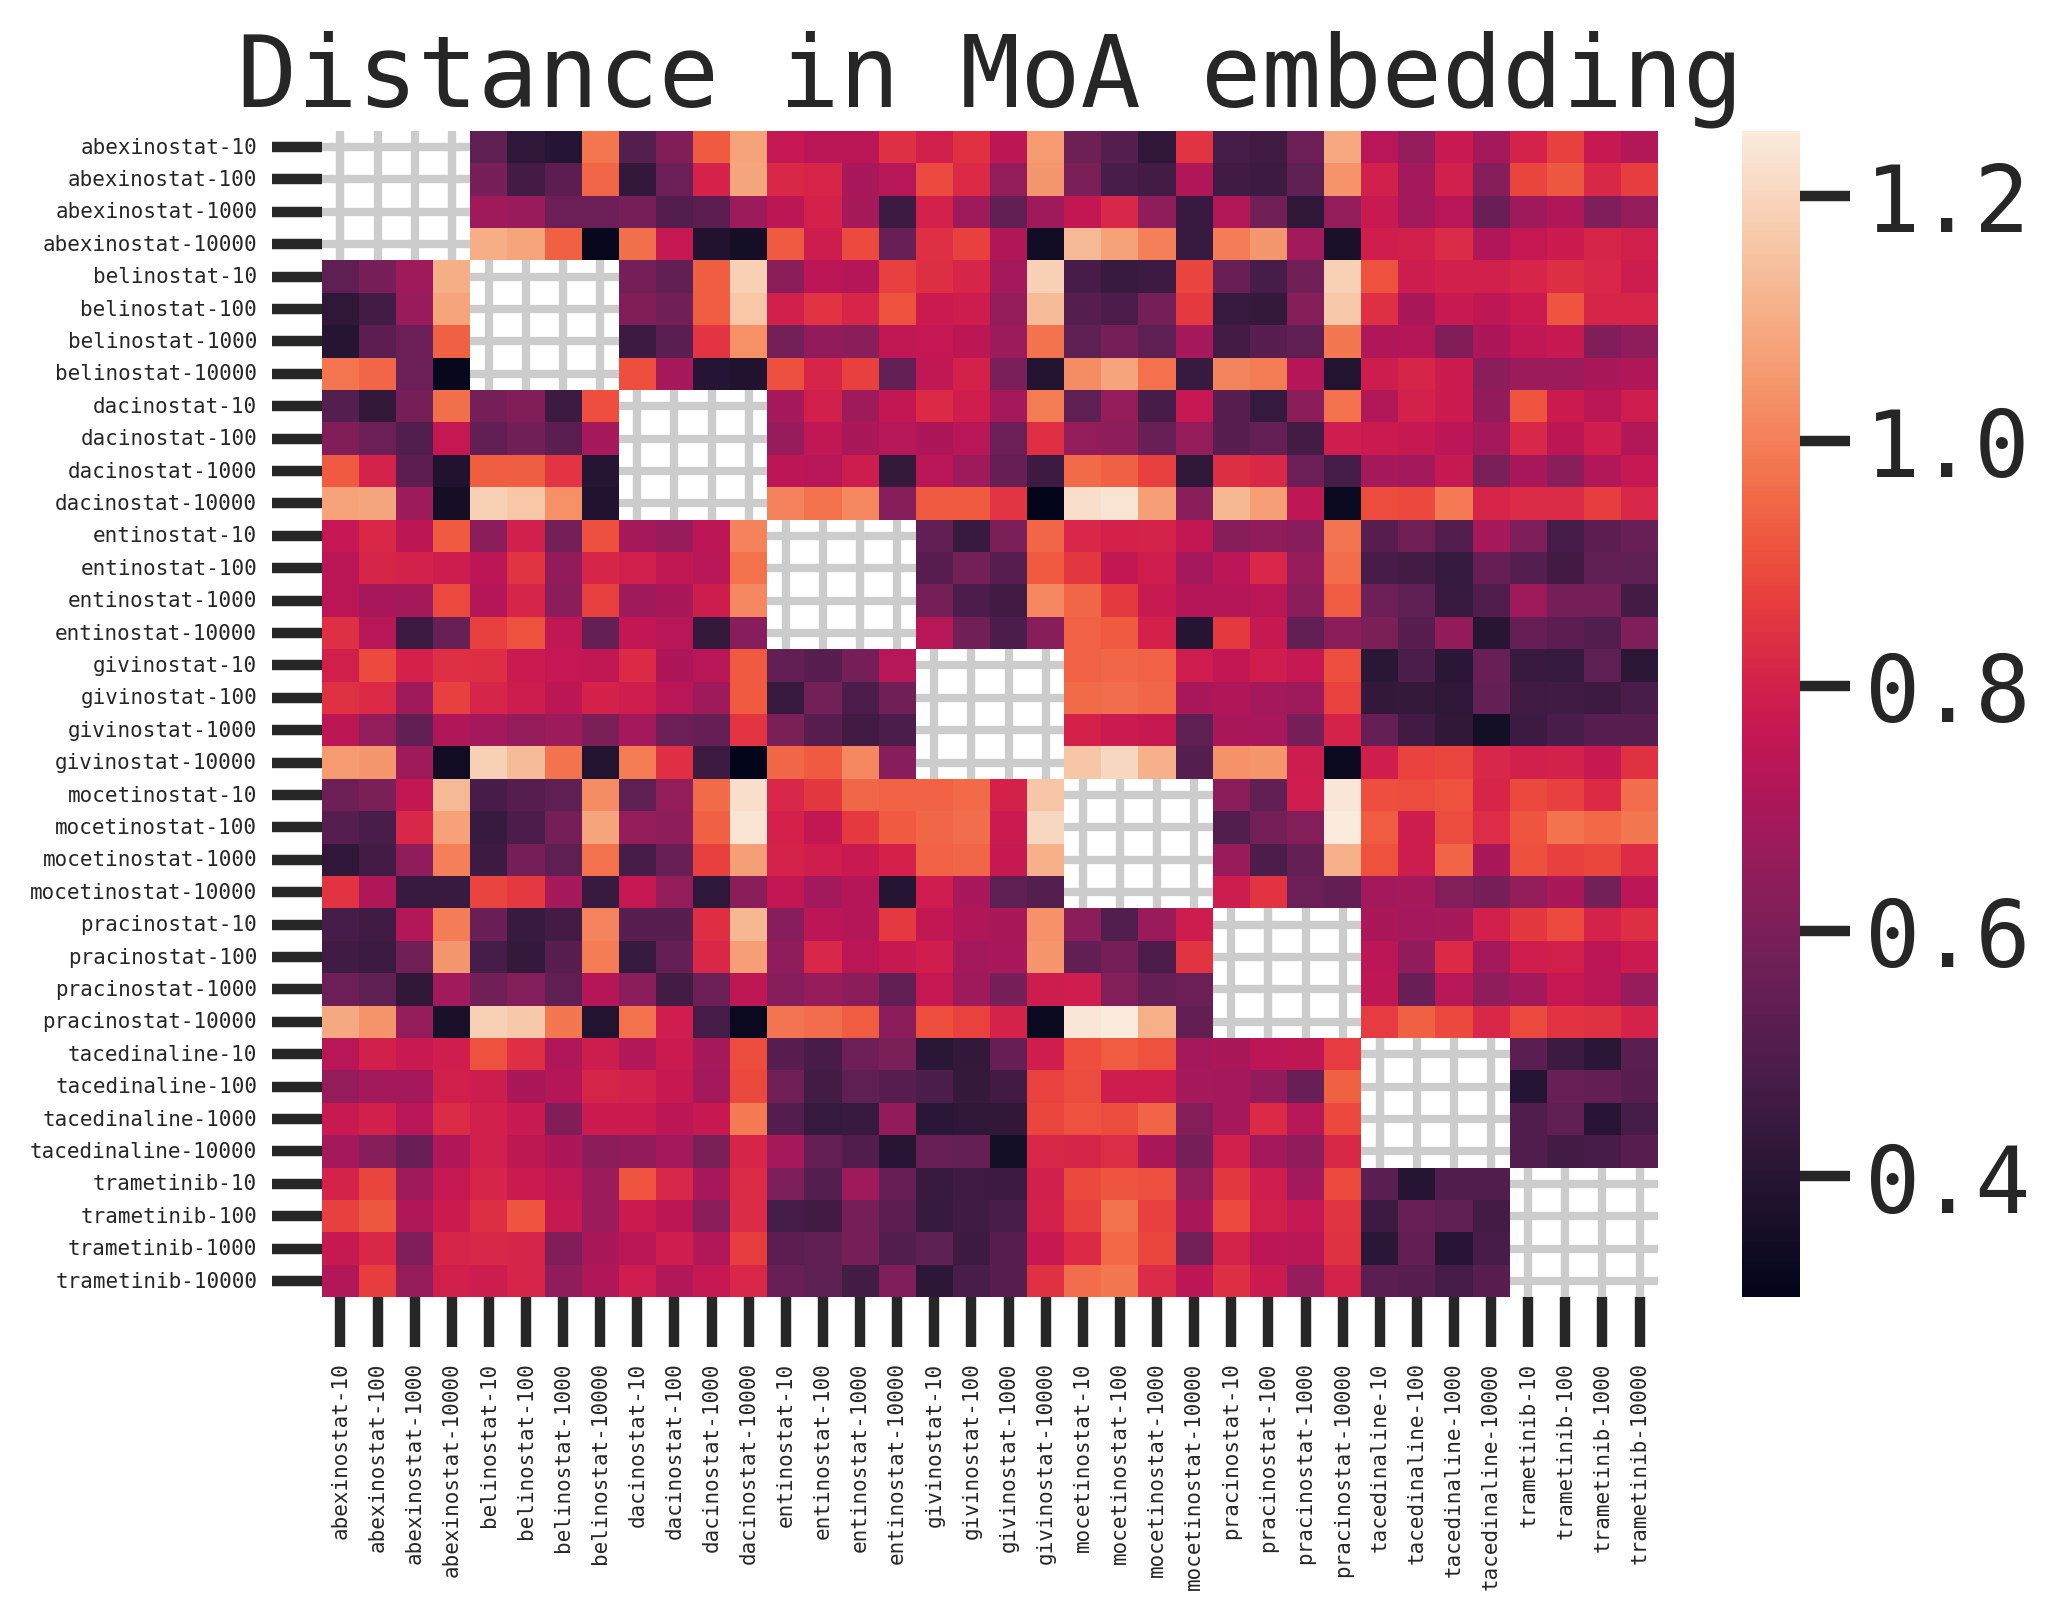

In [31]:
sns.heatmap(data=moa_dist, xticklabels=True, yticklabels=True)
plt.tick_params(which="both", axis="both", labelsize=5)
plt.title("Distance in MoA embedding")
plt.savefig("/Users/alicedriessen/Box/otperturb/alice_exp/figures/MoA_embed_dist_heatmap.png", dpi=300, bbox_inches="tight")

Text(0.5, 1.0, 'RDkit')

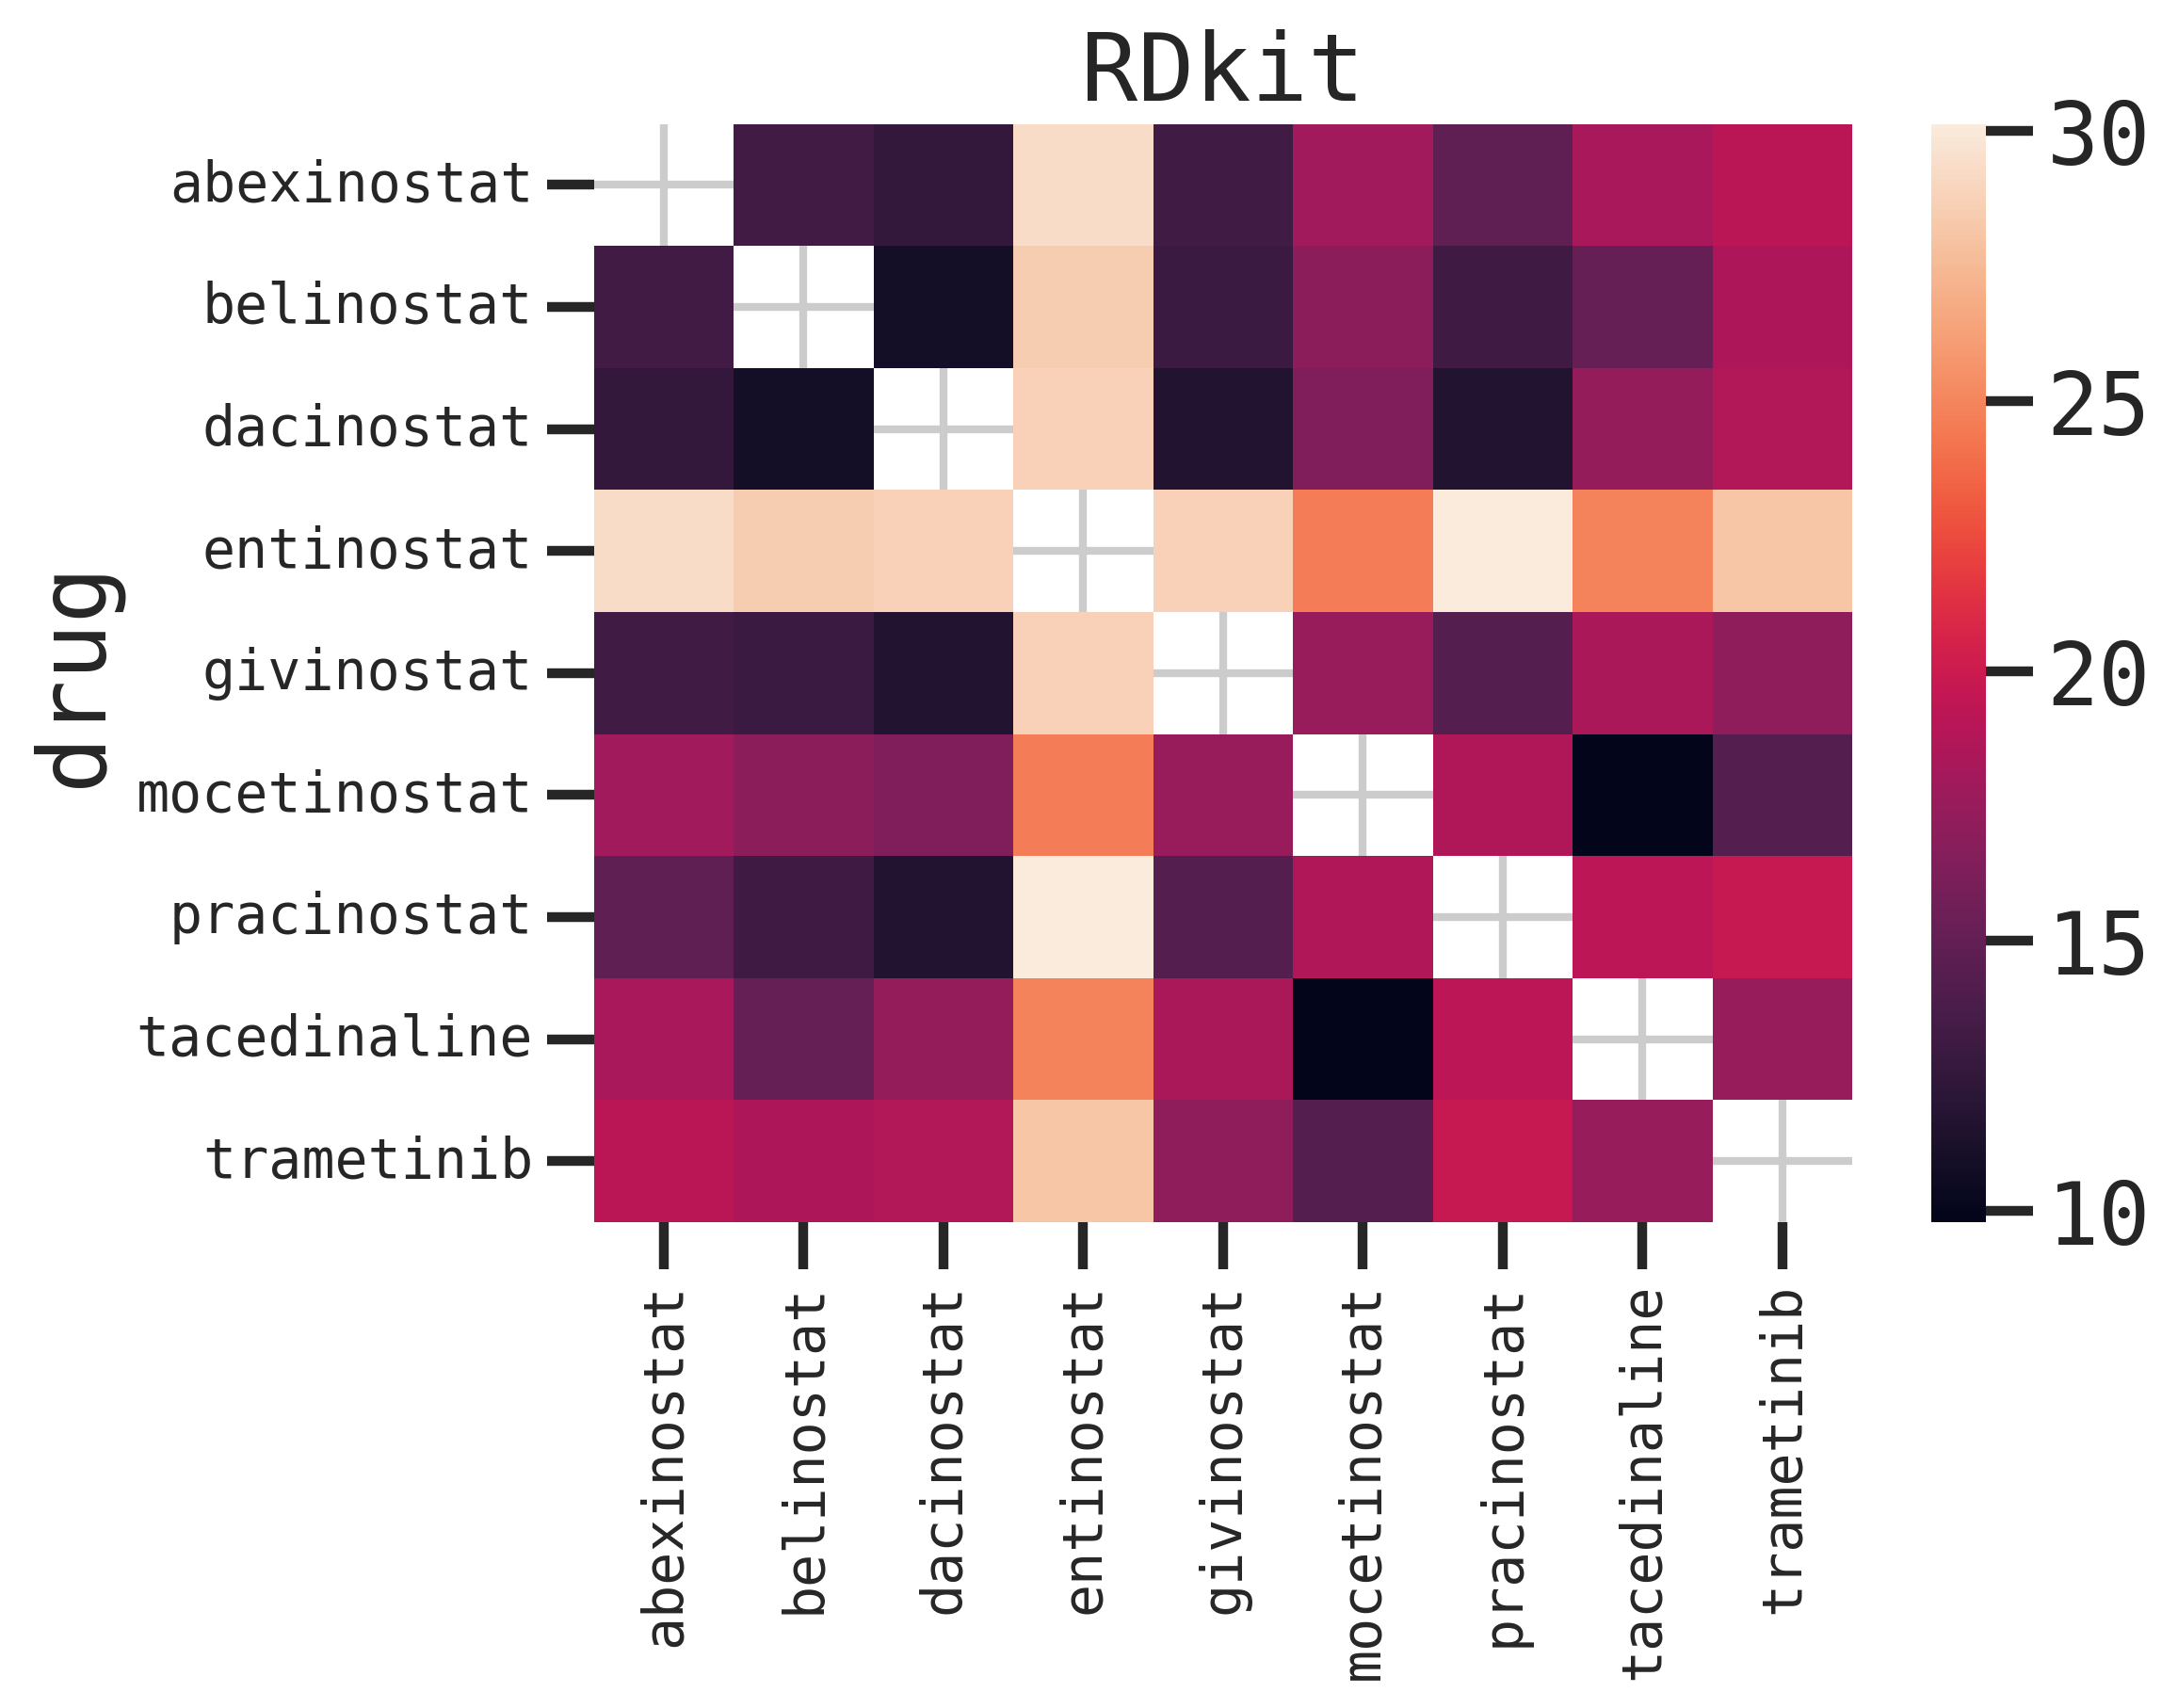

In [32]:
sns.heatmap(data=rdkit_dist)
plt.tick_params(which="both", axis="both", labelsize=14)
plt.title("RDkit")

In [33]:
adata = sc.read_h5ad("/Users/alicedriessen/Box/otperturb/datasets/scrna-sciplex3/hvg.h5ad")

In [34]:
adata.obs

,size_factor,cell_type,replicate,dose,drug_code,pathway_level_1,pathway_level_2,product_name,target,pathway,drug,drug-dose,drug_code-dose,n_genes
A01_E09_RT_BC_100_Lig_BC_147,1.751104,MCF7,rep2,10000,S2718,Tyrosine kinase signaling,RTK activity,TAK-901,Aurora Kinase,Cell Cycle,tak_901,tak_901-10000,S2718-10000,1654
A01_E09_RT_BC_100_Lig_BC_186,0.904866,MCF7,rep2,10,S1143,Tyrosine kinase signaling,RTK activity,AG-490 (Tyrphostin B42),EGFR,Protein Tyrosine Kinase,ag_490,ag_490-10,S1143-10,975
A01_E09_RT_BC_100_Lig_BC_196,1.113908,MCF7,rep2,1000,S1090,Epigenetic regulation,Histone deacetylation,Abexinostat (PCI-24781),HDAC,Cytoskeletal Signaling,abexinostat,abexinostat-1000,S1090-1000,1173
A01_E09_RT_BC_100_Lig_BC_213,1.006722,A549,rep2,1000,S1133,Cell cycle regulation,Aurora kinase activity,Alisertib (MLN8237),Aurora Kinase,Cell Cycle,alisertib,alisertib-1000,S1133-1000,1081
A01_E09_RT_BC_100_Lig_BC_220,0.846831,K562,rep2,10000,S1692,DNA damage & DNA repair,Alkylating agent,Busulfan,DNA alkylator,DNA Damage,busulfan,busulfan-10000,S1692-10000,1007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H12_F10_RT_BC_9_Lig_BC_23,0.845054,MCF7,rep2,10000,S1177,Tyrosine kinase signaling,MAPK activity,PD98059,MEK,MAPK,pd98059,pd98059-10000,S1177-10000,751
H12_F10_RT_BC_9_Lig_BC_237,0.449472,MCF7,rep2,1000,S2391,Antioxidant,Antioxidant,Quercetin,"Src,Sirtuin,PKC,PI3K",Epigenetics,quercetin,quercetin-1000,S2391-1000,428
H12_F10_RT_BC_9_Lig_BC_274,0.656146,K562,rep1,10,S1140,Nuclear receptor signaling,Nuclear receptor activity,Andarine,Androgen Receptor,Endocrinology & Hormones,andarine,andarine-10,S1140-10,517
H12_F10_RT_BC_9_Lig_BC_291,0.422823,MCF7,rep2,100,S1087,DNA damage & DNA repair,ADP-rybosilation,Iniparib (BSI-201),PARP,DNA Damage,iniparib,iniparib-100,S1087-100,495


In [35]:
adata = adata[adata.obs["drug"].isin(sel_res["drug"].unique())]
adata

View of AnnData object with n_obs × n_vars = 36668 × 1000
    obs: 'size_factor', 'cell_type', 'replicate', 'dose', 'drug_code', 'pathway_level_1', 'pathway_level_2', 'product_name', 'target', 'pathway', 'drug', 'drug-dose', 'drug_code-dose', 'n_genes'
    var: 'gene_short_name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'pca', 'rank_genes_groups'
    obsm: 'X_pca'
    varm: 'PCs', 'marker_genes-drug-rank', 'marker_genes-drug-score'

In [36]:
adata.obs[["drug", "pathway_level_2"]].drop_duplicates()

,drug,pathway_level_2
A01_E09_RT_BC_100_Lig_BC_196,abexinostat,Histone deacetylation
A01_E09_RT_BC_102_Lig_BC_220,dacinostat,Histone deacetylation
A01_E09_RT_BC_105_Lig_BC_154,trametinib,MAPK activity
A01_E09_RT_BC_109_Lig_BC_8,belinostat,Histone deacetylation
A01_E09_RT_BC_126_Lig_BC_226,mocetinostat,Histone deacetylation
A01_E09_RT_BC_133_Lig_BC_255,givinostat,Histone deacetylation
A01_E09_RT_BC_139_Lig_BC_1,entinostat,Histone deacetylation
A01_E09_RT_BC_144_Lig_BC_167,tacedinaline,Histone deacetylation
A01_E09_RT_BC_148_Lig_BC_125,pracinostat,Histone deacetylation
